import some Required library

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

import data

In [57]:
data = pd.read_csv("data/survey_results_public.csv")
data_schema= pd.read_csv("data/survey_results_schema.csv")


data.shape  # find out volume of data

(88883, 85)

what we can see when we calling specific data from files  

In [58]:
pd.set_option('display.max_columns', 6)   # number of Colums
pd.set_option('display.max_rows', None)   # number of Rows

                                                Create some functions (most common)

Schedules

In [59]:
def Build_Barh_sizes( key_Phrases , Quantity , Filtered_data ,style , x_axis_visible, sizes, title ):
    
    fig, ax = plt.subplots(figsize=(sizes))


    langs = key_Phrases

    langs_users_num = np.array(Quantity)

    total = len(Filtered_data)

    percent = langs_users_num/total*100


    new_labels = [i+'  {:.1f}%'.format(j) for i, j in zip(langs, percent)]   # Percentage accuracy


    plt.barh(langs, langs_users_num)  
    plt.yticks(range(len(langs)), new_labels) # Percentage representation and layout of axes



    for spine in ax.spines.values():    # Get rid of vertical lines
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible)  # Putting and removing values on the X axis 
    ax.tick_params(axis="y", left=False)
    
    plt.style.use(style)   # Drawing style





    plt.title(title)  # add title
    # reset the plot configurations to default
    #plt.rcdefaults()
    
    # update the overall font size
    #plt.rcParams.update({'font.size':6})

    # change the fontsize of the xtick and ytick labels
    #plt.rc('xtick', labelsize=16)
    #plt.rc('ytick', labelsize=16)

    # change the fontsize of axes title
    #plt.rc('axes', titlesize=20)
    
    plt.show()


Increase-decrease function  (Dictionary)

In [60]:
def sort_Dictionary(Dictionary, reverse = False):        # Sorts by decrease-growth
    return dict(sorted(Dictionary.items(), key = lambda x: x[1], reverse = reverse)) 

Double list sorter-counter function (lists in list)

In [61]:
def Double_list_sort_count(filtered_list ,Increase_decrease):
  
  global key_Phrases    # We declare it as a global variable         reason: To use in other functions
  global Quantity       # We declare it as a global variable         reason: To use in other functions
  global union

  union = []                          # One big list                 reason: To save every list element (for easy count)

  for i in filtered_list:
      for k in i :                    # this function takes all lists elemets and add them into big list (union) 
          union.append(k)

  Counted = Counter(union)            # Count everysing into big list (union) 

  
  sorted = sort_Dictionary(Counted , Increase_decrease)  # Sorts by decrease-growth    "answer will be Dictinary"


  key_Phrases = []  # It contein Phrases 
  Quantity = []     # It contein Quantity of variable

  

  items = sorted.items()    # Takes items from Dictinary 

  for item in items:      
      key_Phrases.append(item[0])   # Add Phrases into Phrases' list
      Quantity.append(item[1])      # Add Quantity into Quantity' list


The most common function for lists  (not lists in list just one list)

In [62]:
def Dictionary_Distributor(filtered_list , Increase_decrease):

    global key_Phrases      # We declare it as a global variable         reason: To use in other functions
    global Quantity         # We declare it as a global variable         reason: To use in other functions

    Counted = Counter(filtered_list)   # Count everysing into filtered_list

    sorted = sort_Dictionary (Counted , Increase_decrease)  # Sorts by decrease-growth    "answer will be Dictinary"

    key_Phrases = []    # It contein Phrases 
    Quantity = []       # It contein Quantity of variable

    for i in sorted:
        key_Phrases.append(i)           # Add Phrases into Phrases' list
        Quantity.append(sorted[i])      # Add Quantity into Quantity' list

                                                    Let's start "Data Analysis"

                                                             Employment

Employment Status

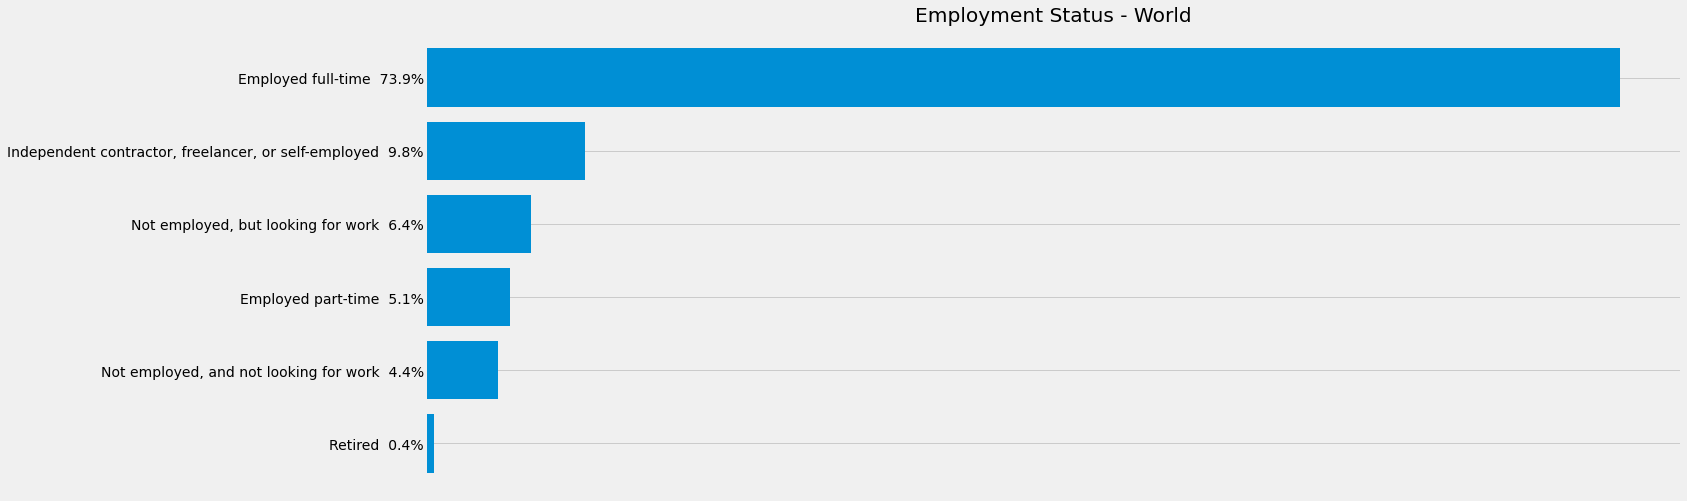

In [63]:
Employment = data['Employment']

Employment.dropna(inplace=True)


Dictionary_Distributor(Employment, False)


Build_Barh_sizes( key_Phrases , Quantity, Employment ,"fivethirtyeight", False , (20,8), "Employment Status - World")  # Building a schedule



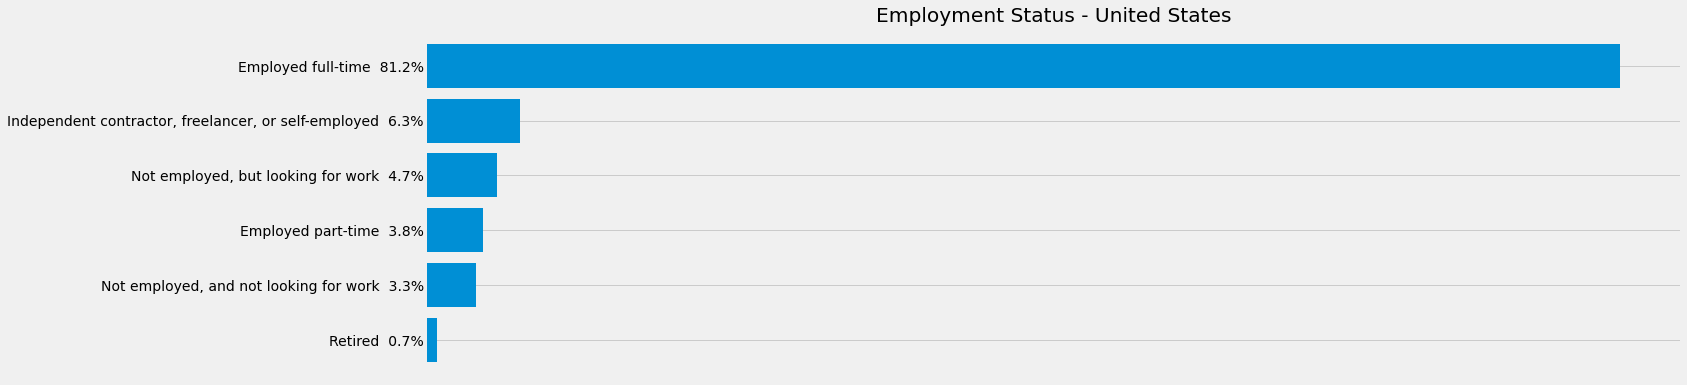

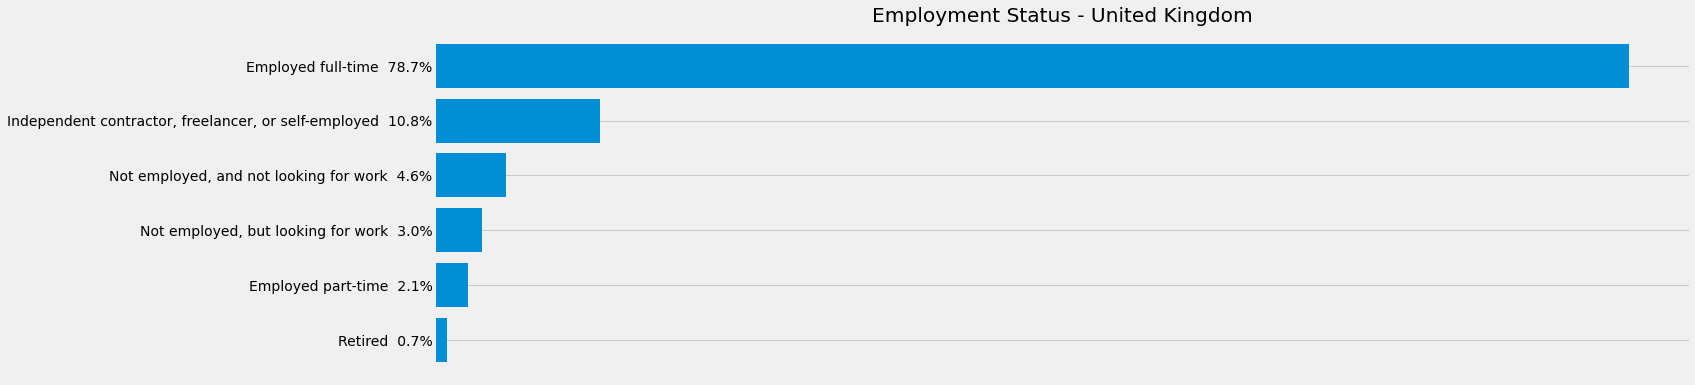

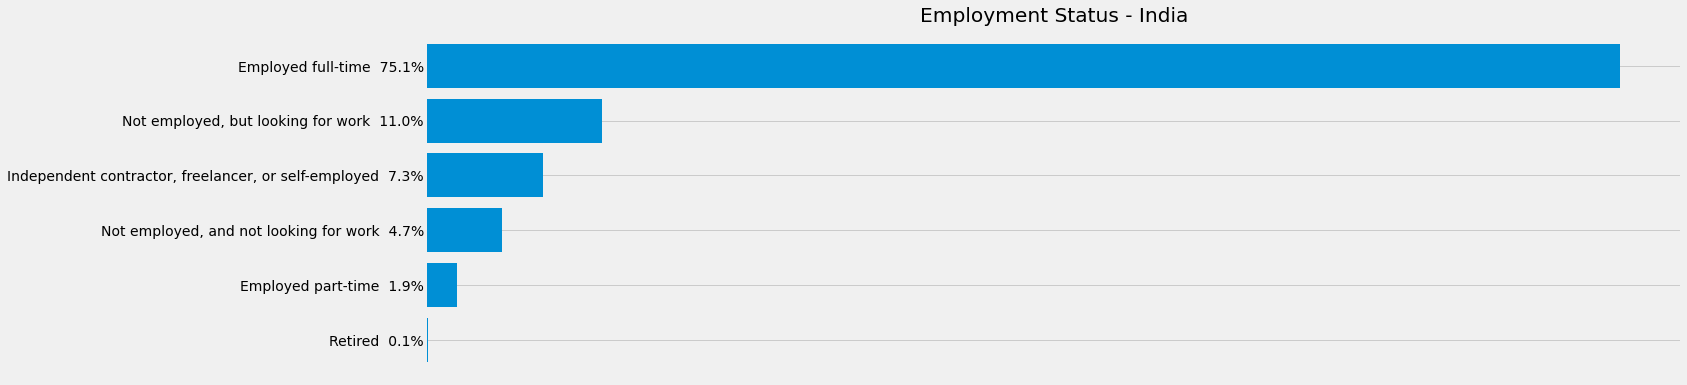

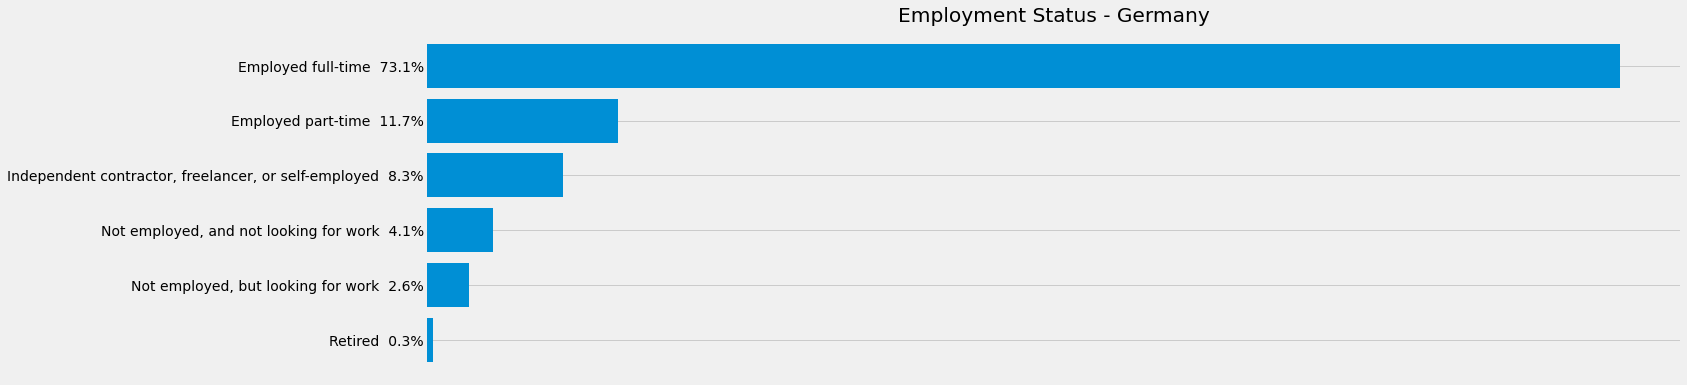

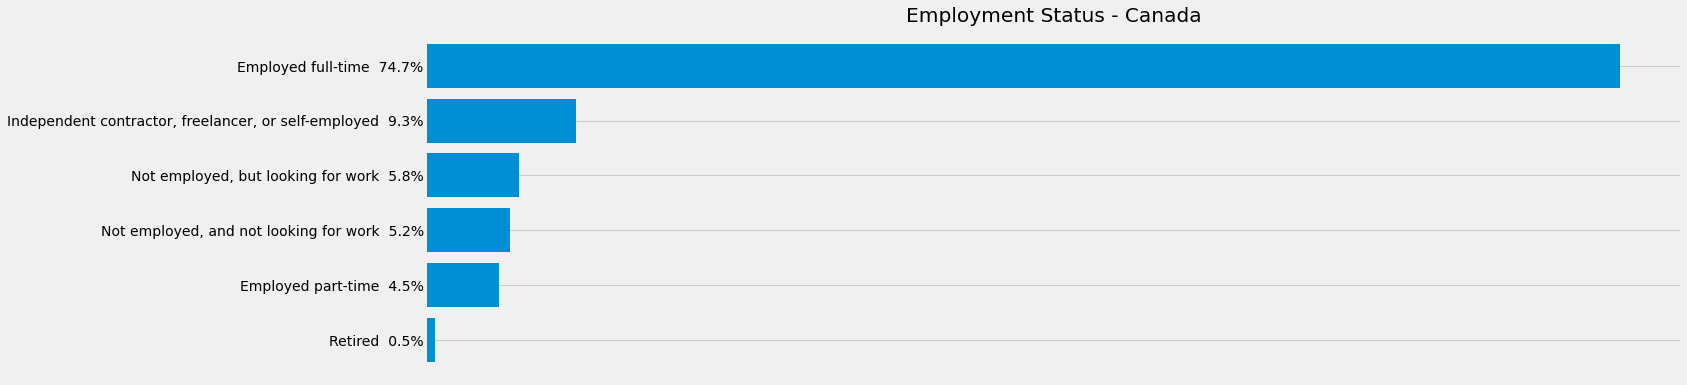

In [64]:
Employment = data["Employment"]
Employment.dropna(inplace=True)

Countries = ["United States", "United Kingdom","India", "Germany","Canada"]

for i in Countries:

    new_Employment = data[ (Employment != "NaN")   &  ( data["Country"] == i ) ]

    new_Employment = new_Employment ["Employment"]


    Dictionary_Distributor(new_Employment , False)

    Build_Barh_sizes( key_Phrases , Quantity, new_Employment ,"fivethirtyeight", False , (20,6), "Employment Status - " + i)  # Building a schedule

                                                                Company Type

Company Size

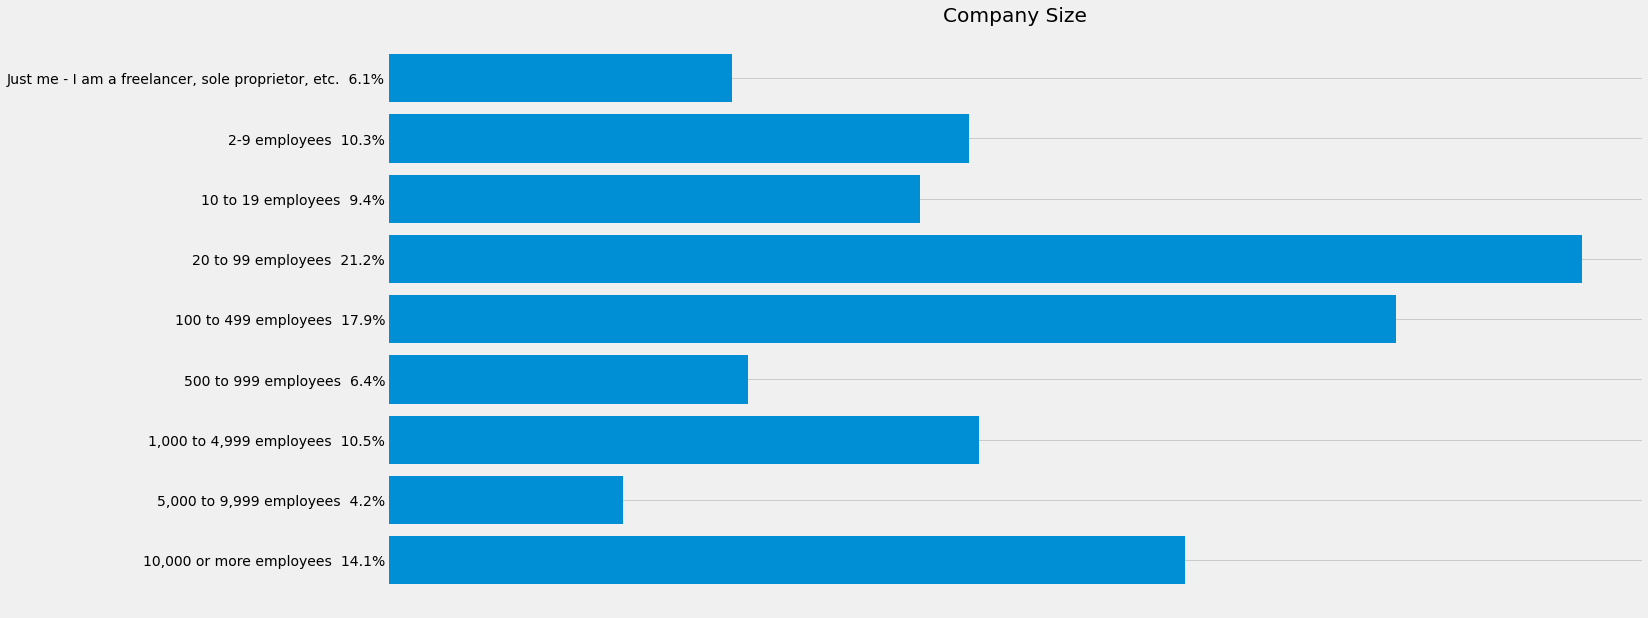

In [65]:
OrgSize = data['OrgSize']

OrgSize.dropna(inplace=True)

OrgSize_Counted = Counter(OrgSize)


key_Phrases = ['Just me - I am a freelancer, sole proprietor, etc.' ,'2-9 employees', '10 to 19 employees' ,'20 to 99 employees','100 to 499 employees', '500 to 999 employees','1,000 to 4,999 employees','5,000 to 9,999 employees','10,000 or more employees',]
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(OrgSize_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, OrgSize ,"fivethirtyeight", False , (20,10), "Company Size")  # Building a schedule



                                                                Career Values

How Do Developers Feel About Their Careers and Jobs?

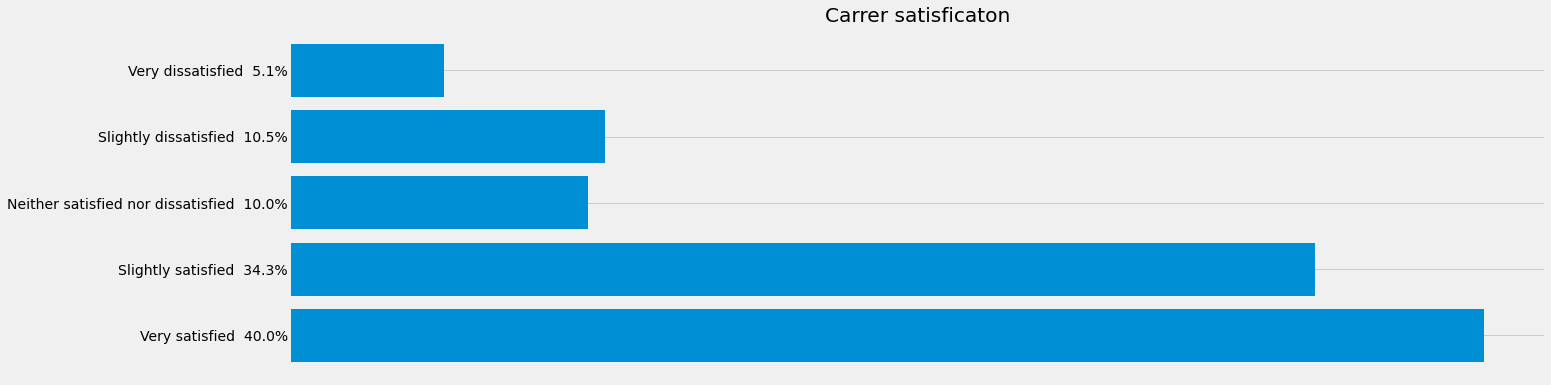

In [66]:
CareerSat = data["CareerSat"]
CareerSat.dropna(inplace=True)

CareerSat_Counted = Counter(CareerSat)

key_Phrases = ['Very dissatisfied','Slightly dissatisfied','Neither satisfied nor dissatisfied','Slightly satisfied','Very satisfied' ]
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(CareerSat_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, CareerSat ,"fivethirtyeight", False , (20,6), "Carrer satisficaton")  # Building a schedule



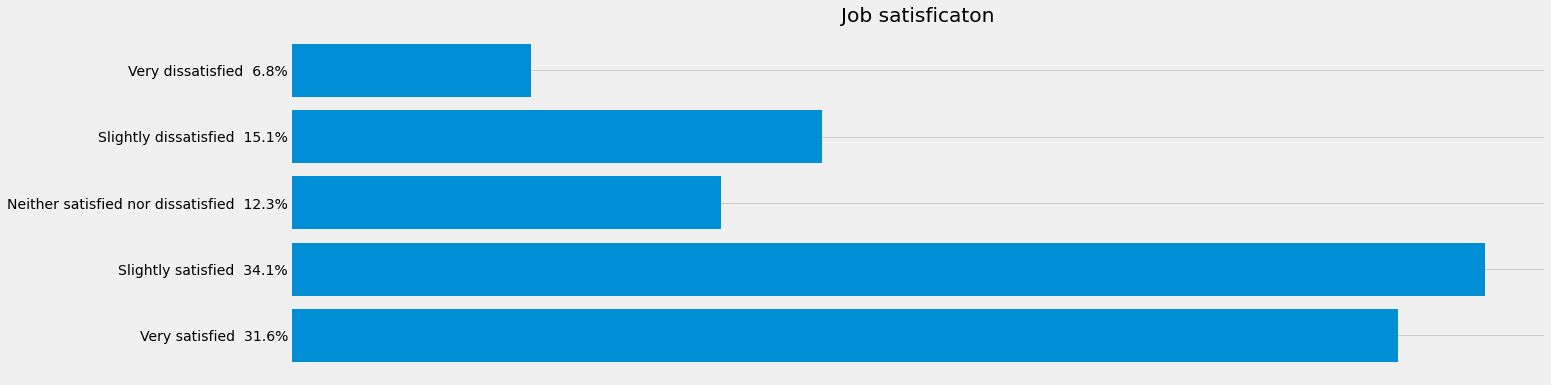

In [67]:
JobSat = data["JobSat"]
JobSat.dropna(inplace=True)

JobSat_Counted = Counter(JobSat)

key_Phrases = key_Phrases = ['Very dissatisfied','Slightly dissatisfied','Neither satisfied nor dissatisfied','Slightly satisfied','Very satisfied' ]
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(JobSat_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, JobSat ,"fivethirtyeight", False , (20,6), "Job satisficaton")  # Building a schedule



How Confident Are Developers in Their Managers?

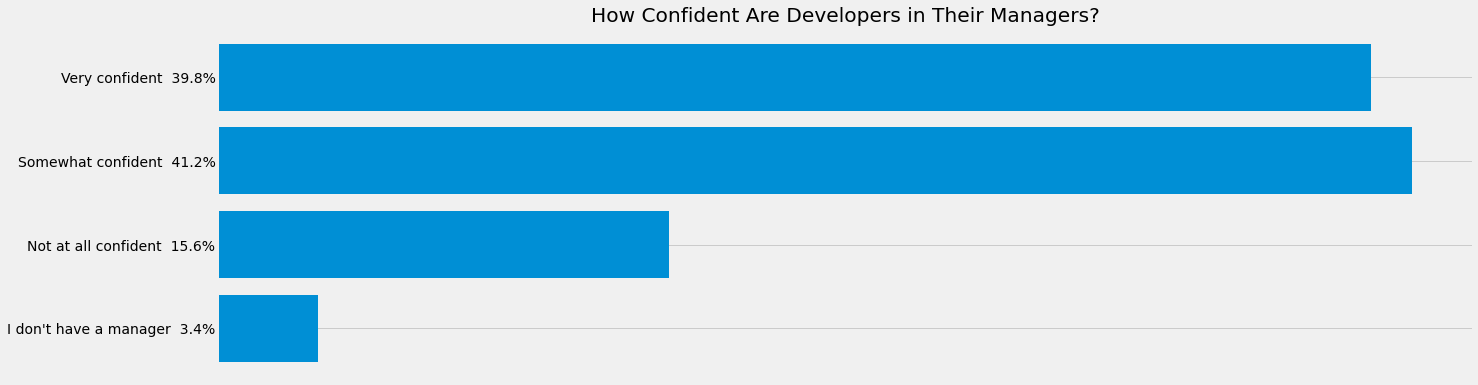

In [68]:
MgrIdiot = data["MgrIdiot"]
MgrIdiot.dropna(inplace=True)

MgrIdiot_Counted = Counter(MgrIdiot)

key_Phrases = key_Phrases = ["Very confident",'Somewhat confident','Not at all confident',"I don't have a manager"]
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(MgrIdiot_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, MgrIdiot ,"fivethirtyeight", False , (20,6), "How Confident Are Developers in Their Managers?")  # Building a schedule


Do Developers Need to Become Managers to Make More Money?

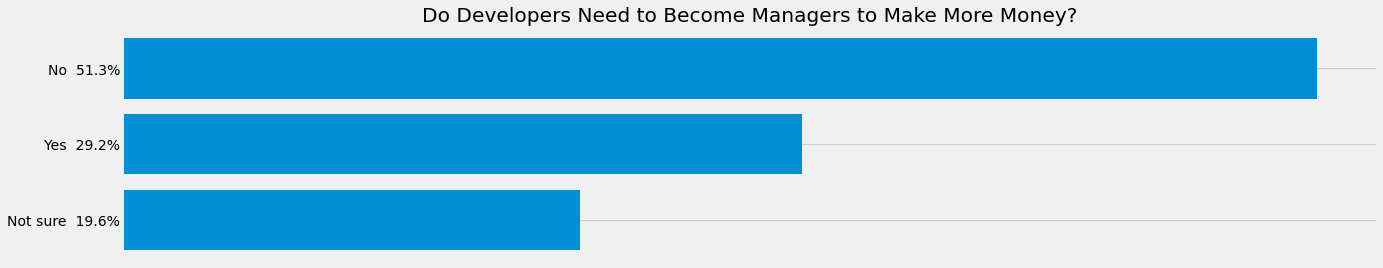

In [69]:
MgrMoney = data["MgrMoney"]
MgrMoney.dropna(inplace=True)

Dictionary_Distributor(MgrMoney , False)

Build_Barh_sizes( key_Phrases , Quantity, MgrMoney ,"fivethirtyeight", False , (20,4), "Do Developers Need to Become Managers to Make More Money?")  # Building a schedule


Do Developers Want To Become Managers in the Future?

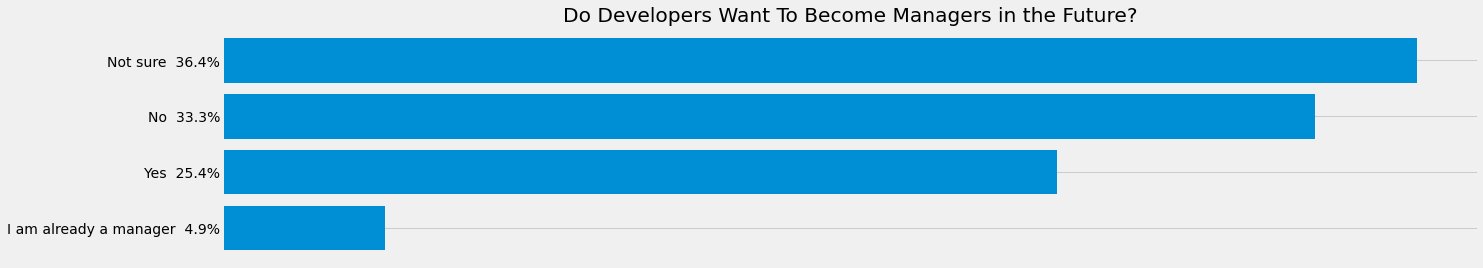

In [70]:
MgrWant = data["MgrWant"]
MgrWant.dropna(inplace=True)

Dictionary_Distributor(MgrWant , False)

Build_Barh_sizes( key_Phrases , Quantity, MgrWant ,"fivethirtyeight", False , (20,4), "Do Developers Want To Become Managers in the Future?")  # Building a schedule


                                                                Looking for a Job

Job Search Status

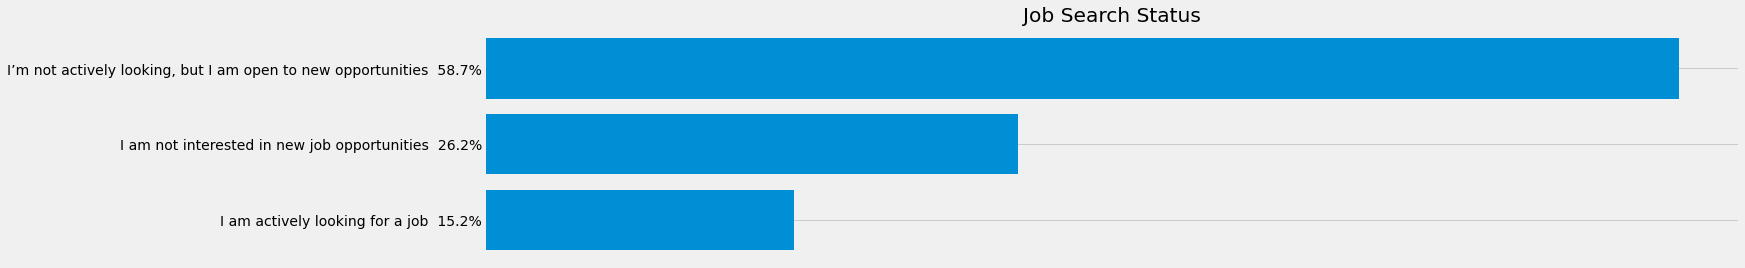

In [71]:
JobSeek = data["JobSeek"]
JobSeek.dropna(inplace=True)

Dictionary_Distributor(JobSeek , False)

Build_Barh_sizes( key_Phrases , Quantity, JobSeek ,"fivethirtyeight", False , (20,4), "Job Search Status")  # Building a schedule


Job Search Status by Geography

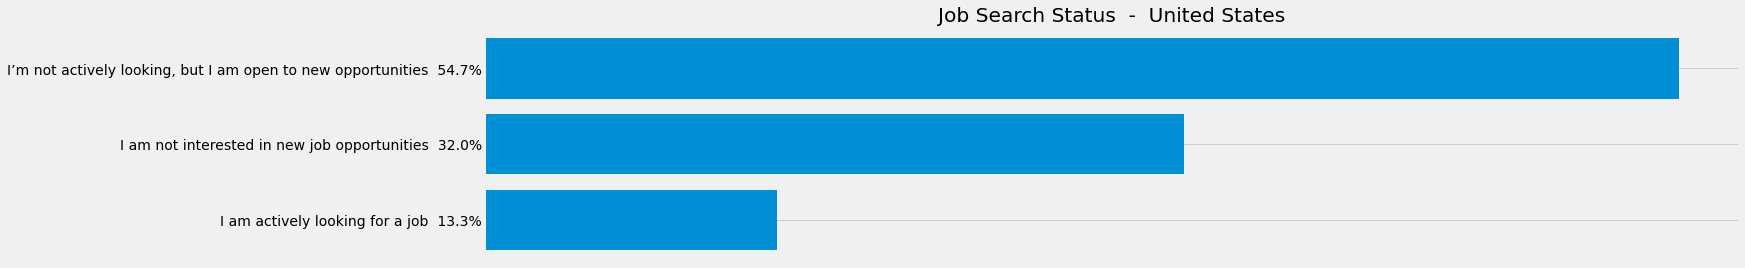

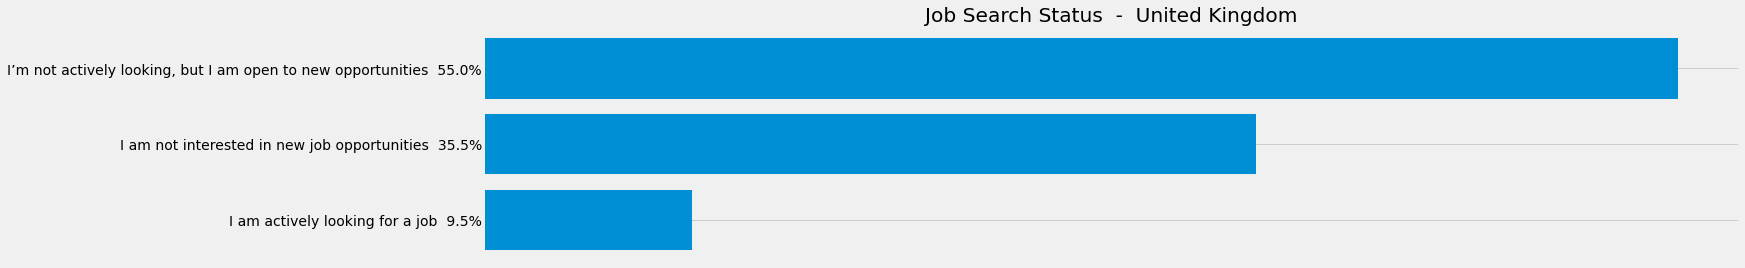

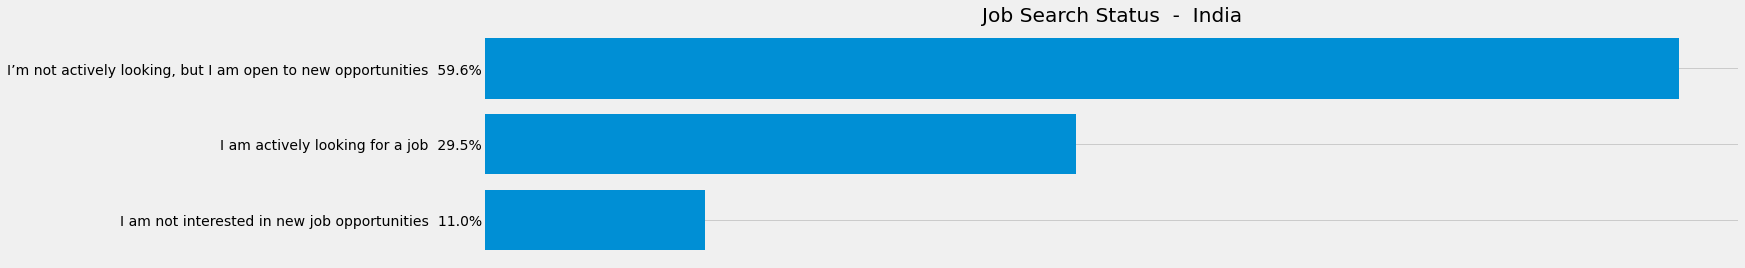

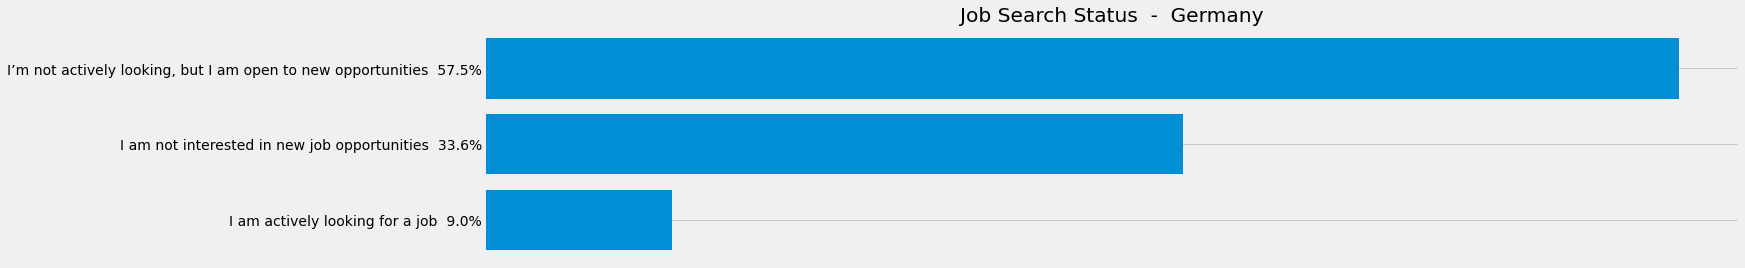

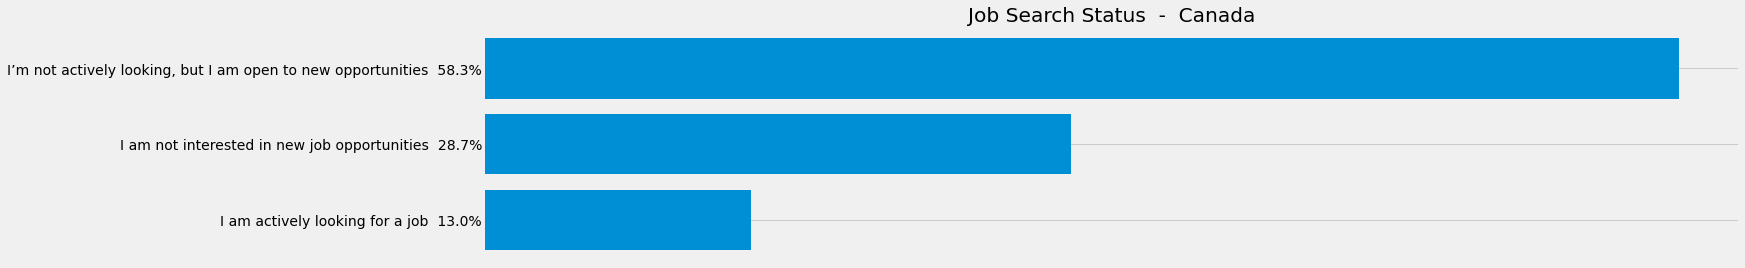

In [72]:
JobSeek = data["JobSeek"]
JobSeek.dropna(inplace=True)

Countries = ["United States", "United Kingdom","India", "Germany","Canada"]

for i in Countries:

    new_JobSeek = data[ (JobSeek != "NaN")   &  ( data["Country"] == i ) ]

    new_JobSeek = new_JobSeek ["JobSeek"]


    Dictionary_Distributor(new_JobSeek , False)

    Build_Barh_sizes( key_Phrases , Quantity, new_JobSeek ,"fivethirtyeight", False , (20,4), "Job Search Status  -  " + i)  # Building a schedule



Who's Actively Looking for a Job?

C:\Python\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


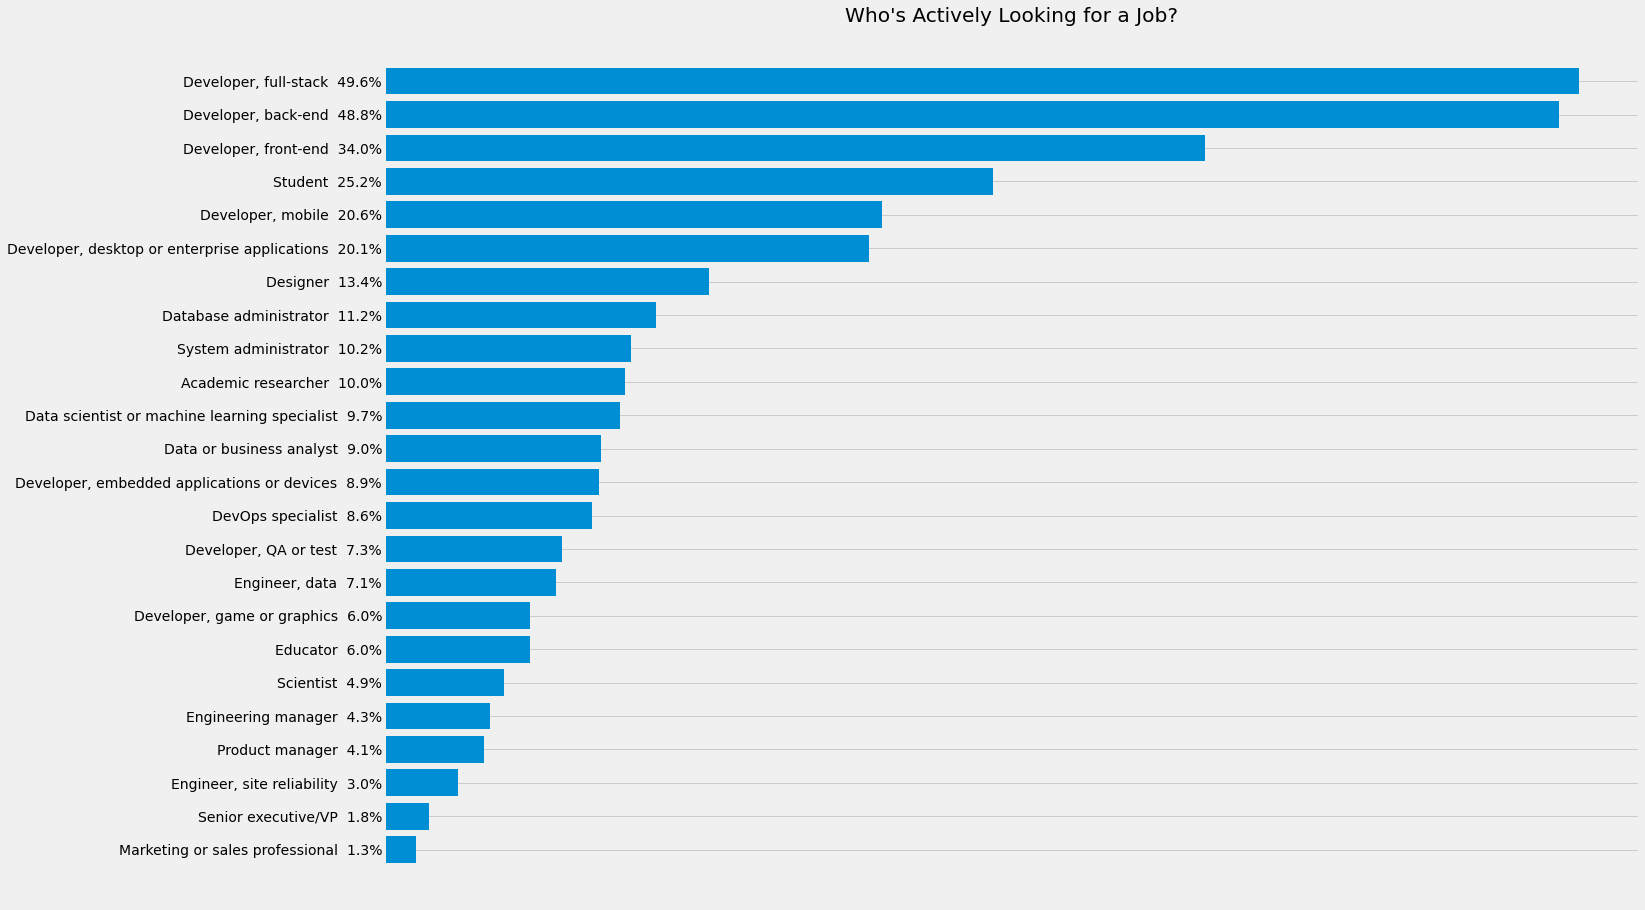

In [73]:
JobSeek = data["JobSeek"]
JobSeek.dropna(inplace=True)


new_JobSeek = data[(JobSeek == 'I am actively looking for a job')  &  ( data["DevType"] != "NaN" ) ]

new_DevType = new_JobSeek ["DevType"]

new_DevType.dropna(inplace=True)

new_DevType = new_DevType.str.split(";")


Double_list_sort_count(new_DevType , False)

Build_Barh_sizes( key_Phrases , Quantity, new_DevType ,"fivethirtyeight", False , (20,15), "Who's Actively Looking for a Job?")  # Building a schedule

How Long Ago Did Developers Last Change Jobs?

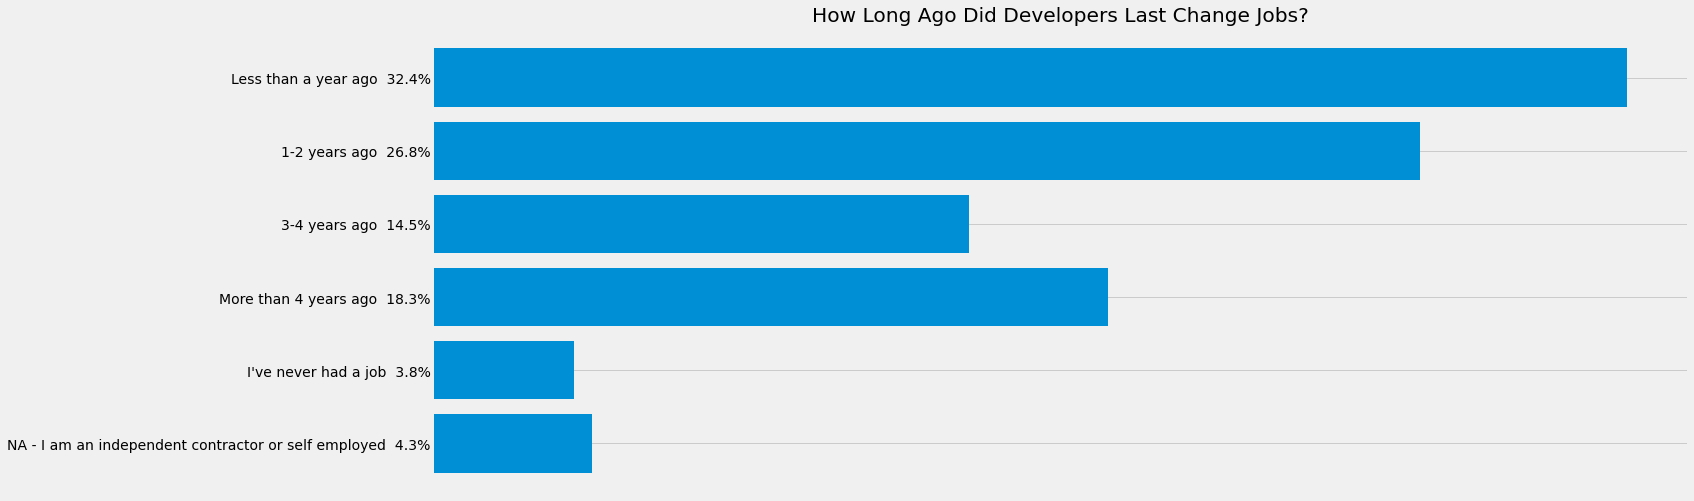

In [74]:
LastHireDate = data["LastHireDate"]
LastHireDate.dropna(inplace=True)

LastHireDate_Counted = Counter(LastHireDate)

key_Phrases = key_Phrases = ["Less than a year ago",'1-2 years ago','3-4 years ago',"More than 4 years ago" , "I've never had a job" , 'NA - I am an independent contractor or self employed']
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(LastHireDate_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, LastHireDate ,"fivethirtyeight", False , (20,8), "How Long Ago Did Developers Last Change Jobs?")  # Building a schedule


Interview Practices

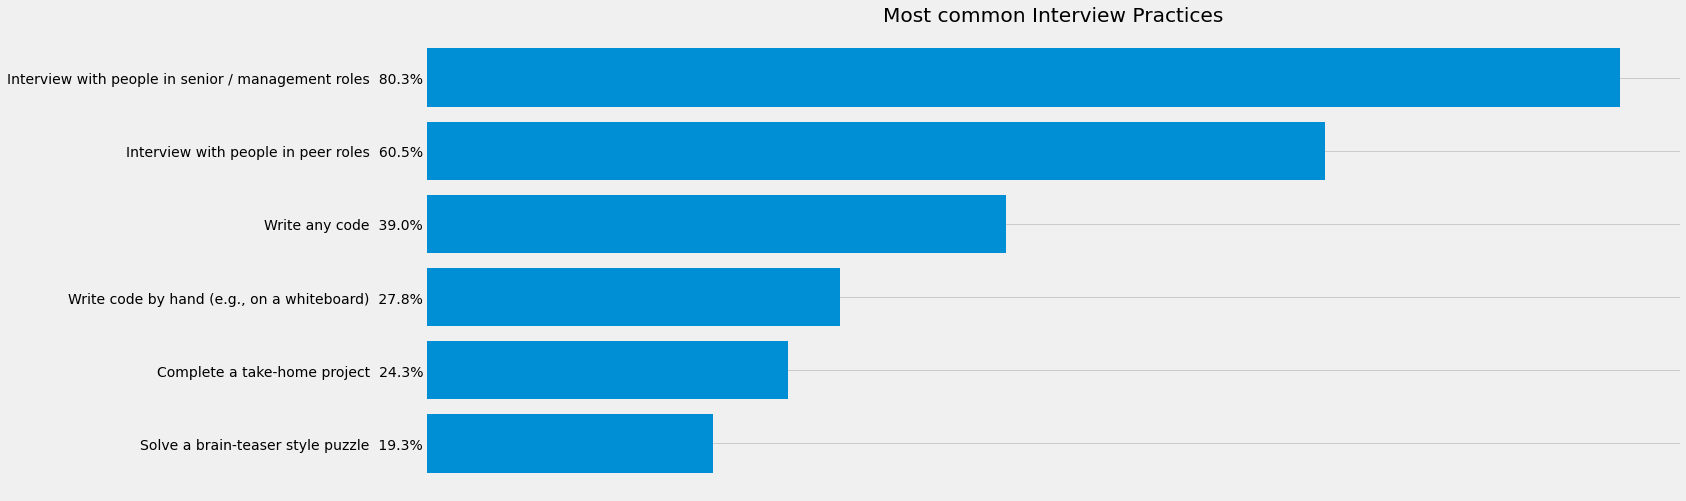

In [75]:
LastInt = data["LastInt"]
LastInt.dropna(inplace=True)
LastInt = LastInt.str.split(";")

Double_list_sort_count(LastInt , False)

Build_Barh_sizes( key_Phrases , Quantity, LastInt ,"fivethirtyeight", False , (20,8), "Most common Interview Practices")  # Building a schedule


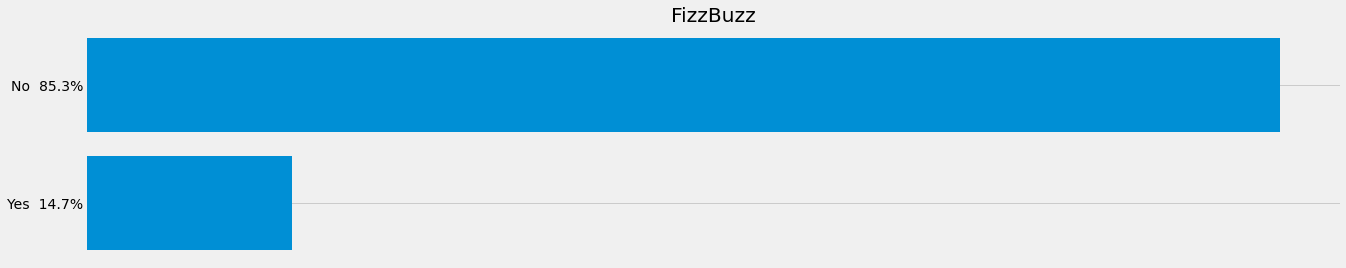

In [76]:
FizzBuzz = data["FizzBuzz"]
FizzBuzz.dropna(inplace=True)


Dictionary_Distributor(FizzBuzz , False)

Build_Barh_sizes( key_Phrases , Quantity, FizzBuzz ,"fivethirtyeight", False , (20,4), "FizzBuzz")  # Building a schedule


Updating That Resume

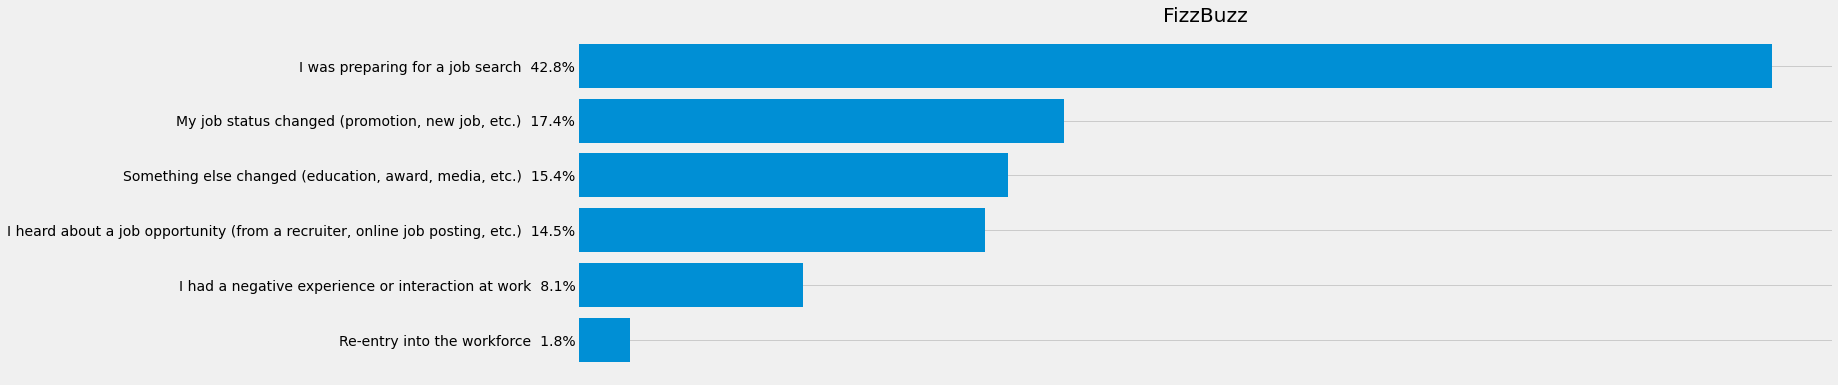

In [77]:
ResumeUpdate = data["ResumeUpdate"]
ResumeUpdate.dropna(inplace=True)

Dictionary_Distributor(ResumeUpdate , False)

Build_Barh_sizes( key_Phrases , Quantity, ResumeUpdate ,"fivethirtyeight", False , (20,6), "FizzBuzz")  # Building a schedule

                                                                Job Priorities

Most Important Job Factors

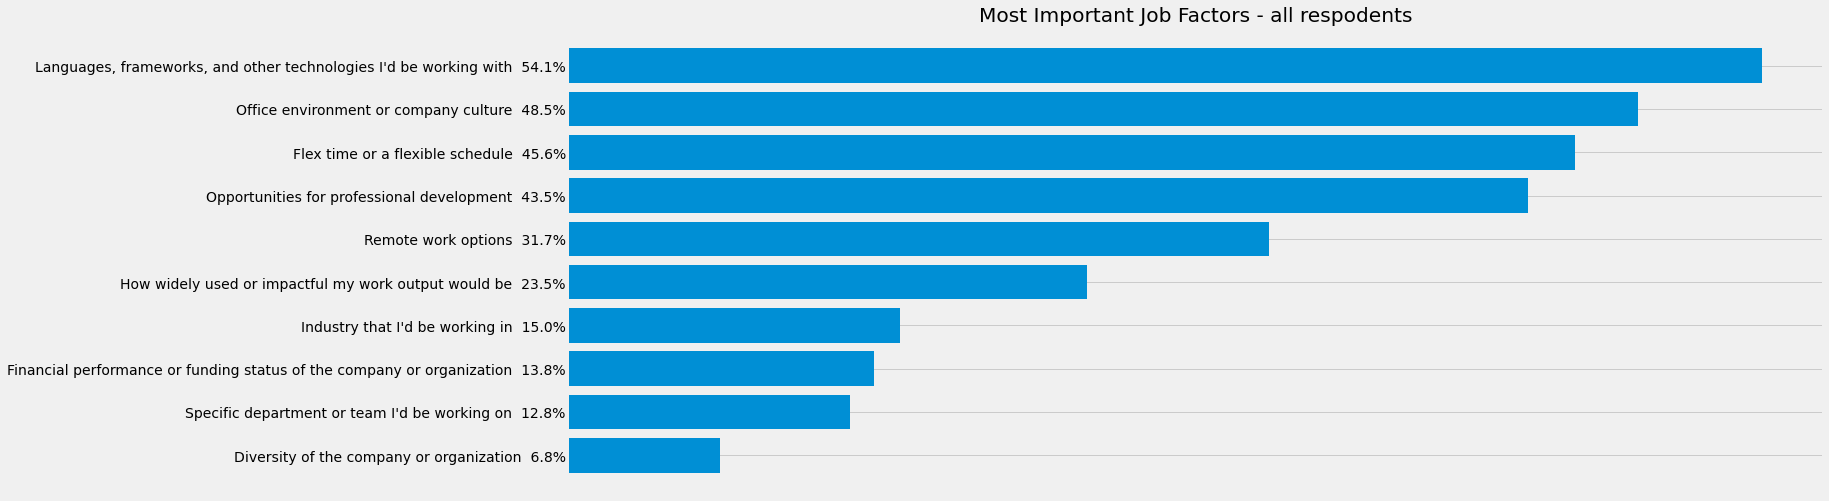

In [78]:
JobFactors = data["JobFactors"]
JobFactors.dropna(inplace=True)
JobFactors = JobFactors.str.split(";")

Double_list_sort_count(JobFactors , False)

Build_Barh_sizes( key_Phrases , Quantity, JobFactors ,"fivethirtyeight", False , (20,8), "Most Important Job Factors - all respodents")  # Building a schedule

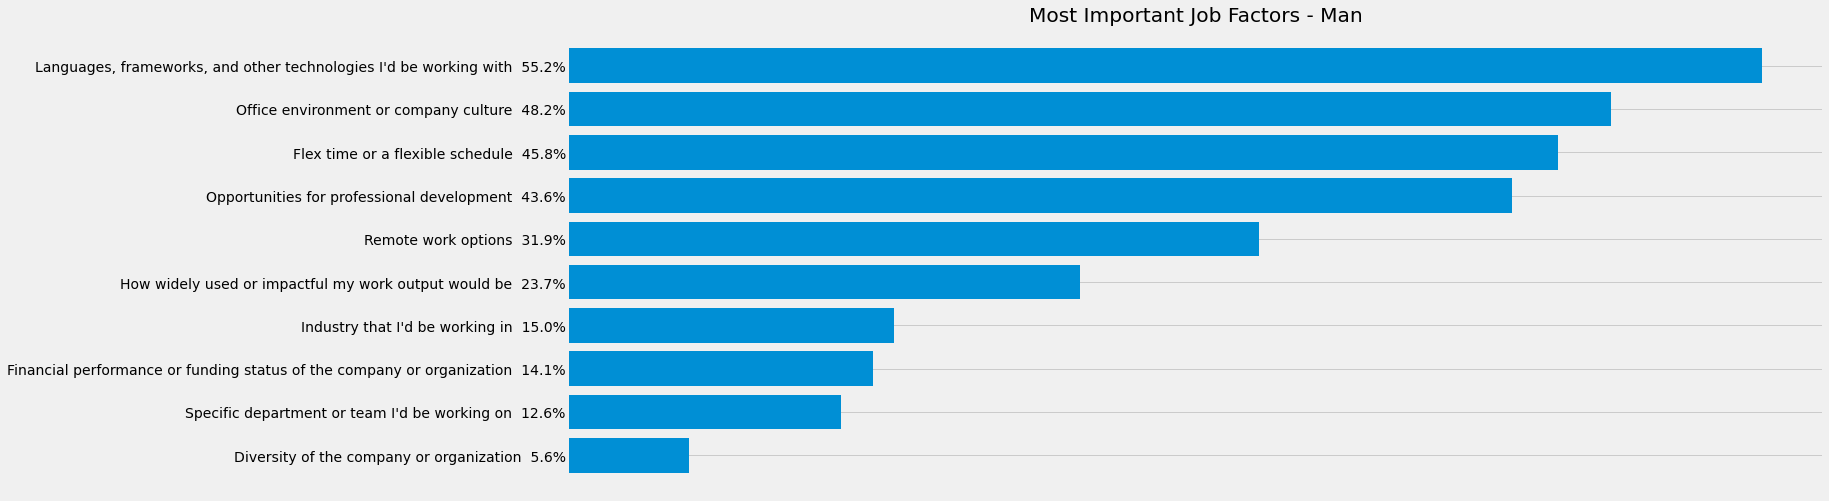

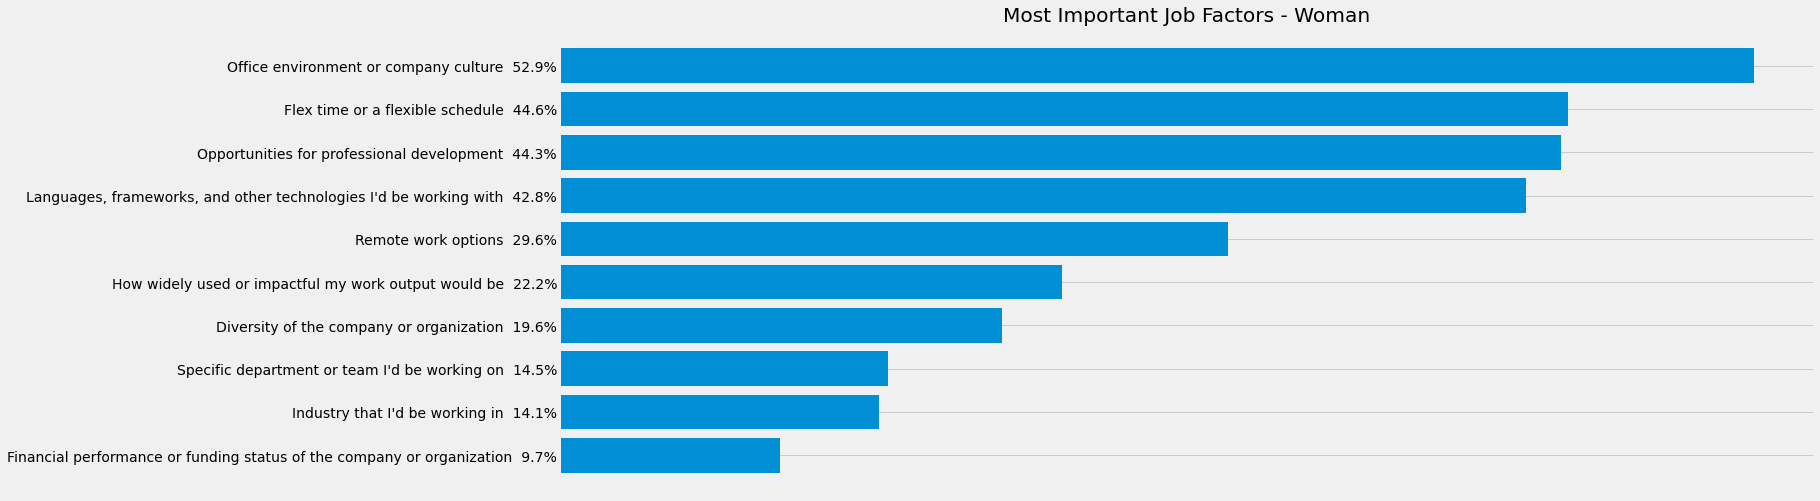

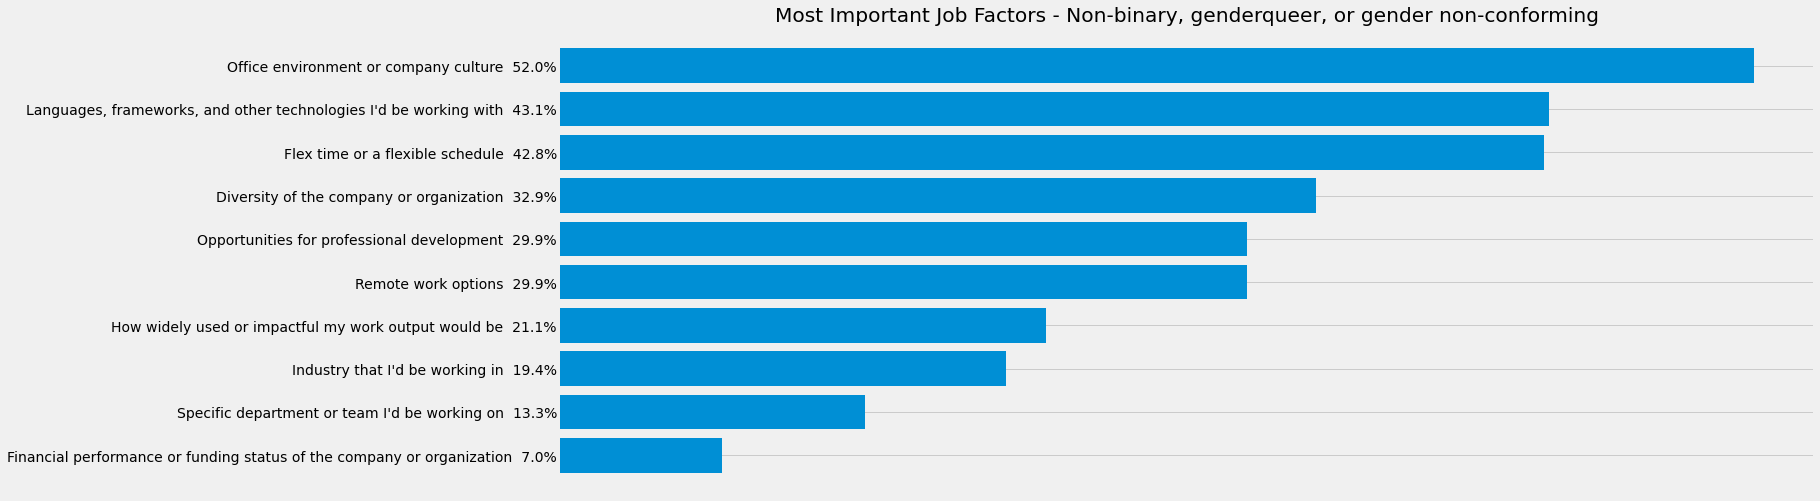

In [79]:
JobFactors = data["JobFactors"]
JobFactors.dropna(inplace=True)

Man = ["Man" , "Man;Non-binary, genderqueer, or gender non-conforming" ,"Woman;Man;Non-binary, genderqueer, or gender non-conforming", "Woman;Man"  ]
Non_binary = ['Non-binary, genderqueer, or gender non-conforming','Woman;Man;Non-binary, genderqueer, or gender non-conforming', 'Woman;Non-binary, genderqueer, or gender non-conforming', 'Man;Non-binary, genderqueer, or gender non-conforming' ]
Woman = ['Woman','Woman;Non-binary, genderqueer, or gender non-conforming','Woman;Man;Non-binary, genderqueer, or gender non-conforming', 'Woman;Man'  ]

Gender = [Man, Woman, Non_binary]

for i in Gender:
    new_list = []

    for k in i:
        new_data = data[ (JobFactors != "NaN") & ( data["Gender"] == k)]

        new_JobFactors = new_data["JobFactors"]
        new_JobFactors = new_JobFactors.str.split(";")

        for s in new_JobFactors:
            new_list.append(s)
    

    

    Double_list_sort_count(new_list , False)

    Build_Barh_sizes( key_Phrases , Quantity, new_list ,"fivethirtyeight", False , (20,8), "Most Important Job Factors - " + i[0])  # Building a schedule


Weighting Important Job Factors in the US

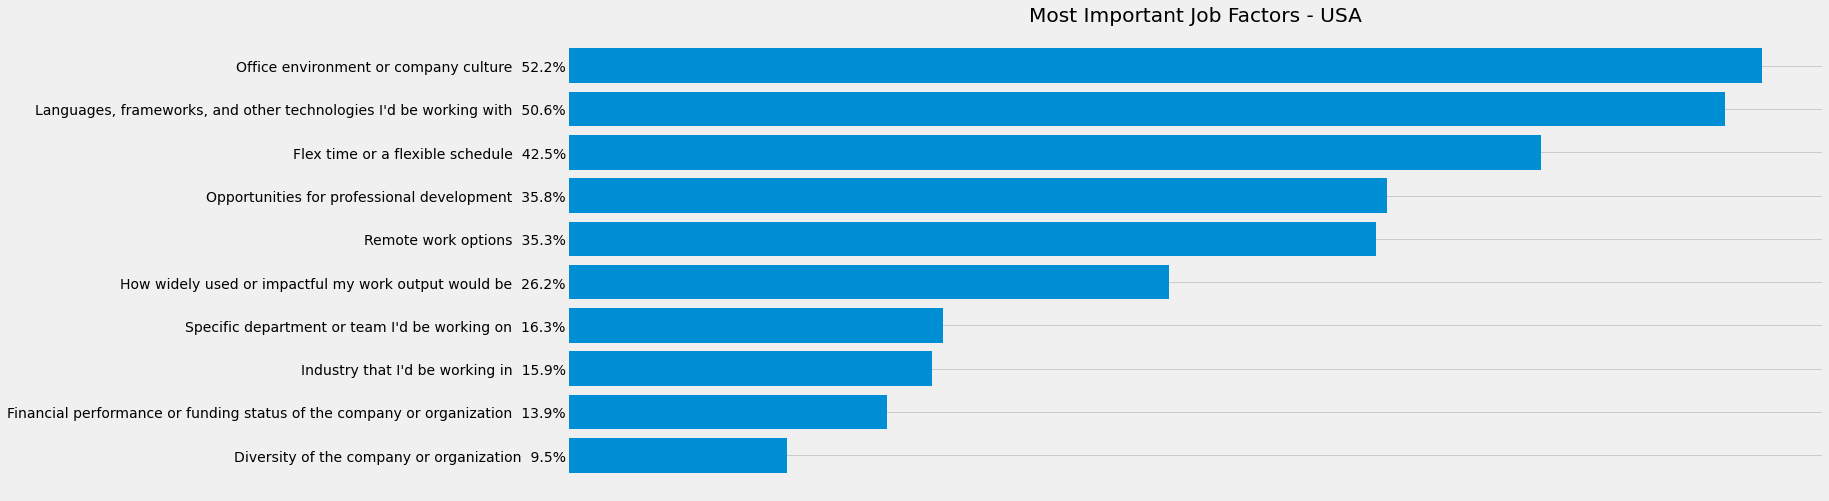

In [80]:
JobFactors = data["JobFactors"]
JobFactors.dropna(inplace=True)


new_data = data[ (JobFactors != "NaN") & (data["Country"] == "United States")]

new_JobFactors = new_data["JobFactors"]
new_JobFactors = new_JobFactors.str.split(";")

Double_list_sort_count(new_JobFactors , False)

Build_Barh_sizes( key_Phrases , Quantity, new_JobFactors ,"fivethirtyeight", False , (20,8), "Most Important Job Factors - USA")  # Building a schedule

How Often Do Developers Work Remotely?

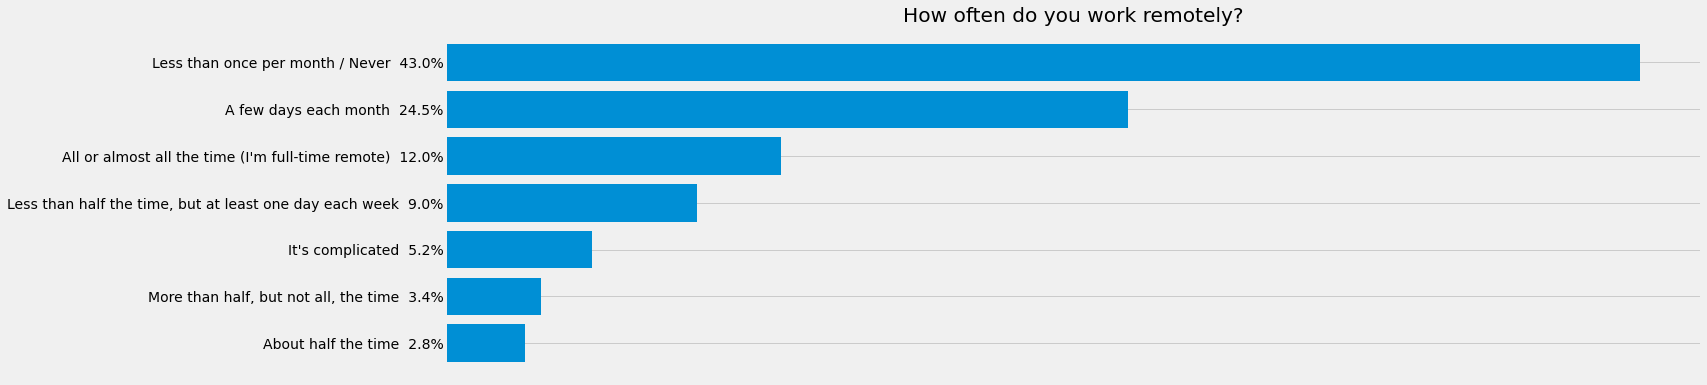

In [81]:
WorkRemote = data["WorkRemote"]
WorkRemote.dropna(inplace=True)

Dictionary_Distributor(WorkRemote , False)

Build_Barh_sizes( key_Phrases , Quantity, WorkRemote ,"fivethirtyeight", False , (20,6), "How often do you work remotely?")  # Building a schedule

Where Do Developers Want to Work?

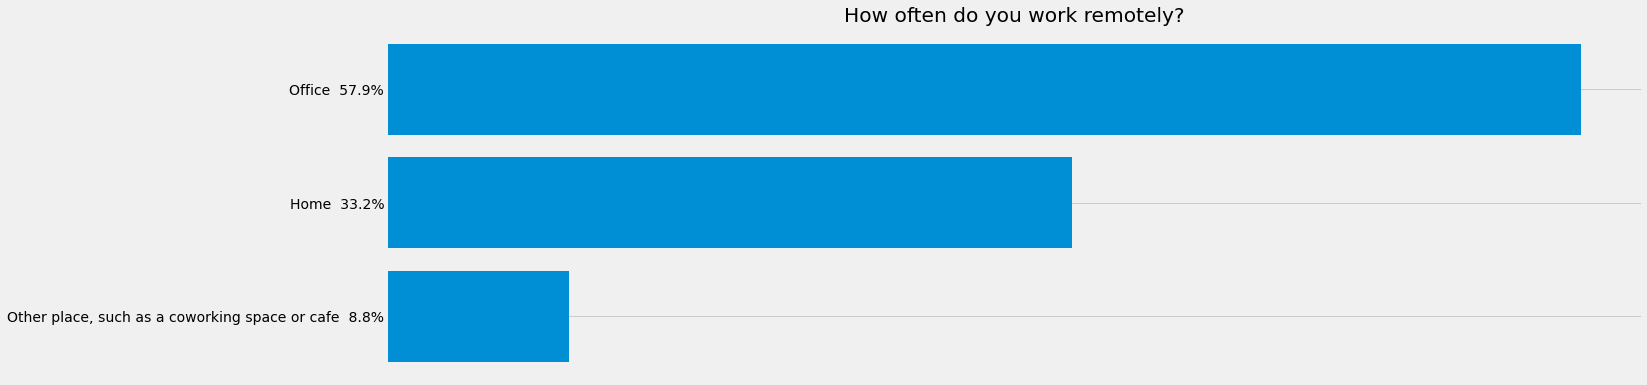

In [82]:
WorkLoc = data["WorkLoc"]
WorkLoc.dropna(inplace=True)

Dictionary_Distributor(WorkLoc , False)

Build_Barh_sizes( key_Phrases , Quantity, WorkLoc ,"fivethirtyeight", False , (20,6), "How often do you work remotely?")  # Building a schedule

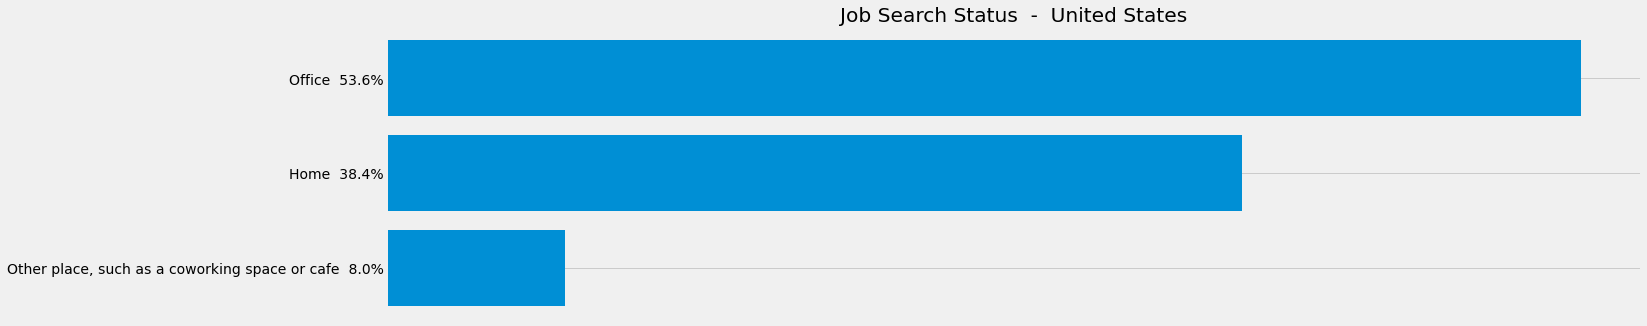

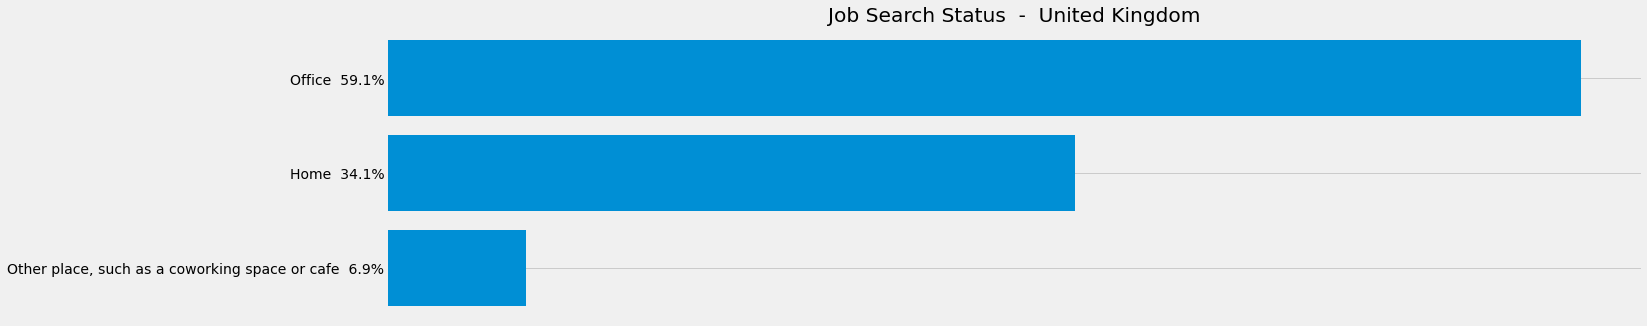

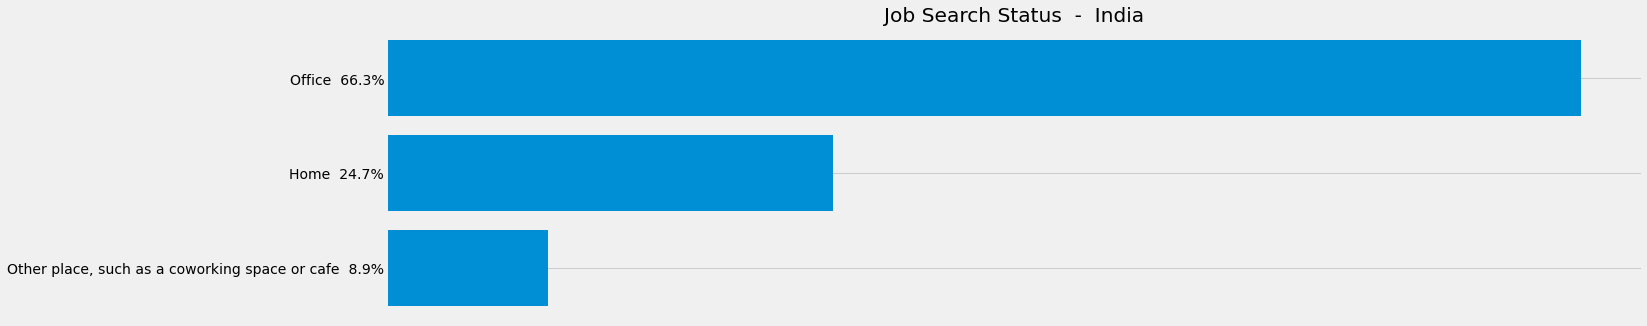

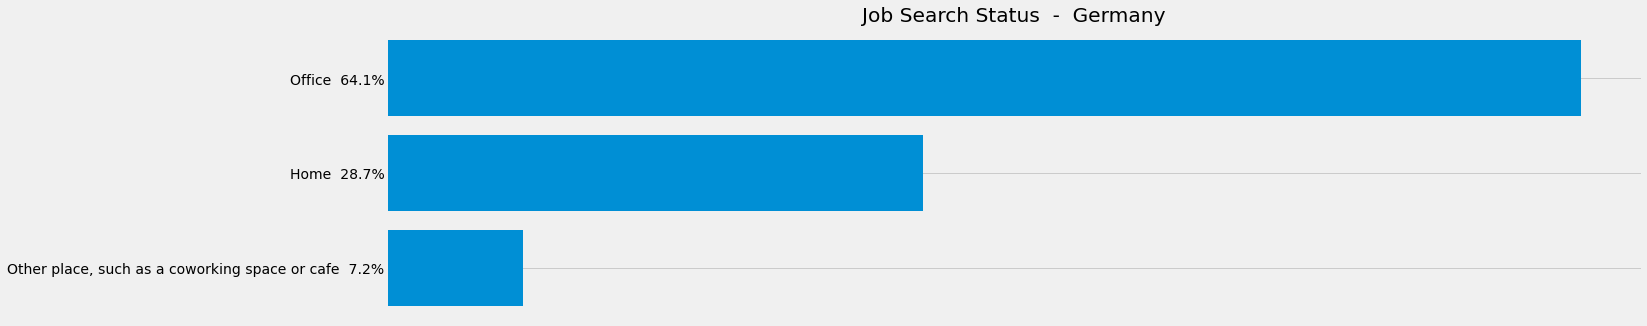

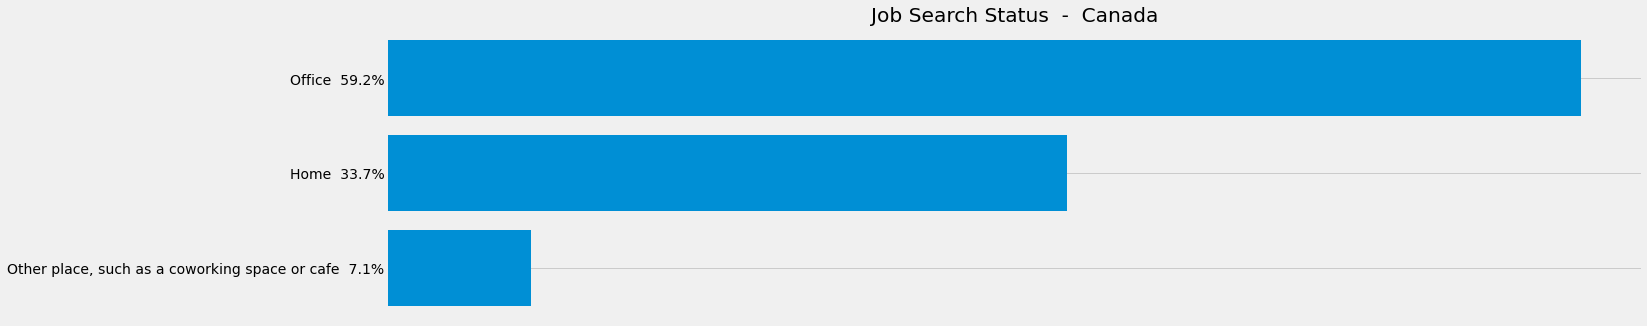

In [83]:
WorkLoc = data["WorkLoc"]
WorkLoc.dropna(inplace=True)

Countries = ["United States", "United Kingdom","India", "Germany","Canada"]

for i in Countries:

    new_WorkLoc = data[ (WorkLoc != "NaN")   &  ( data["Country"] == i ) ]

    new_WorkLoc = new_WorkLoc ["WorkLoc"]


    Dictionary_Distributor(new_WorkLoc , False)

    Build_Barh_sizes( key_Phrases , Quantity, new_WorkLoc ,"fivethirtyeight", False , (20,5), "Job Search Status  -  " + i)  # Building a schedule



                                                                Development Practices

How Structured Is the Work of Developers?

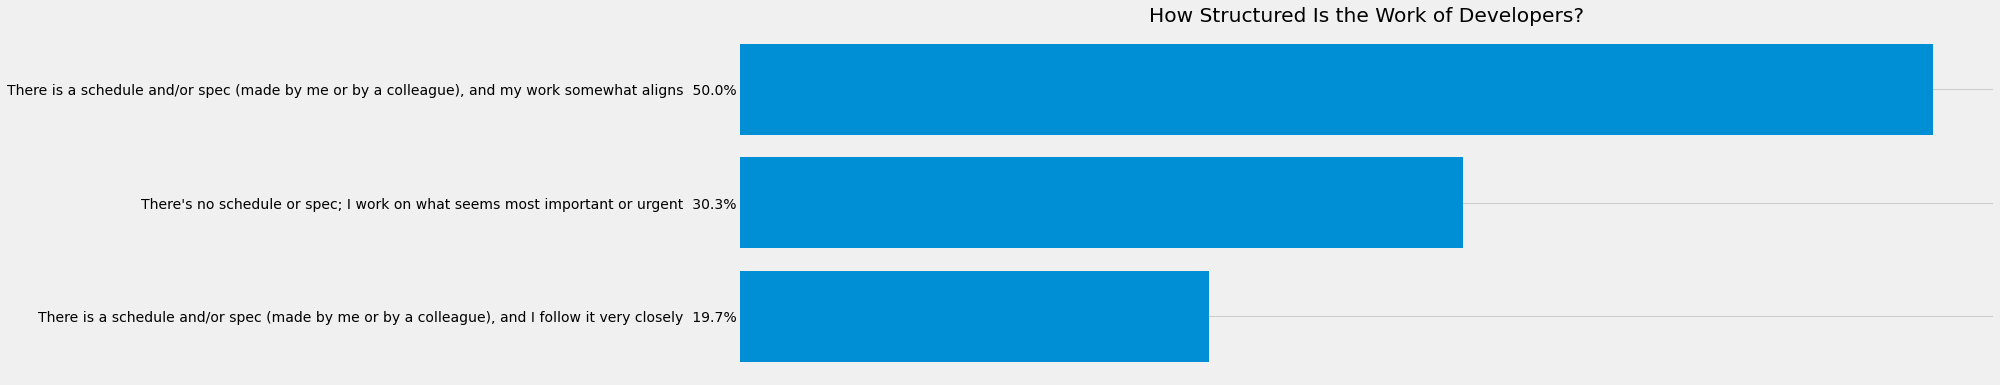

In [84]:
WorkPlan = data["WorkPlan"]
WorkPlan.dropna(inplace=True)

Dictionary_Distributor(WorkPlan , False)

Build_Barh_sizes( key_Phrases , Quantity, WorkPlan ,"fivethirtyeight", False , (20,6), "How Structured Is the Work of Developers?")  # Building a schedule

Greatest Challenges to Productivity

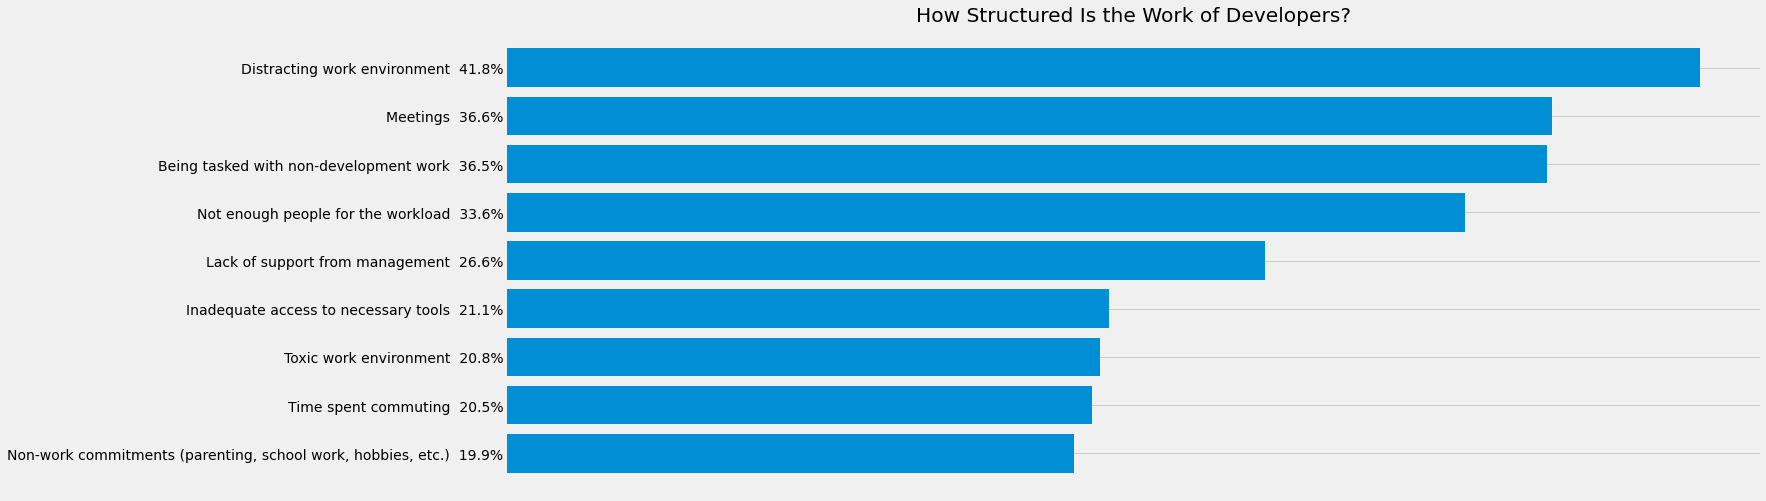

In [85]:
WorkChallenge = data["WorkChallenge"]
WorkChallenge.dropna(inplace=True)
WorkChallenge = WorkChallenge.str.split(";")


Double_list_sort_count(WorkChallenge , False)

Build_Barh_sizes( key_Phrases , Quantity, WorkChallenge ,"fivethirtyeight", False , (20,8), "How Structured Is the Work of Developers?")  # Building a schedule

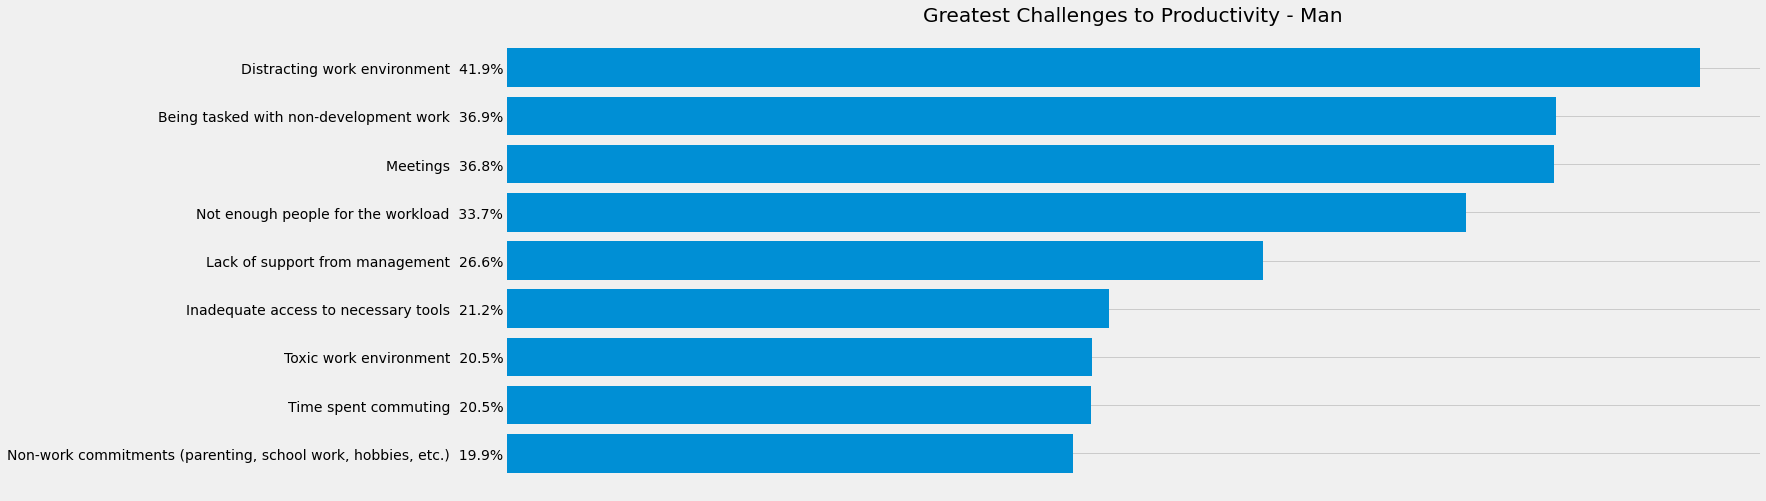

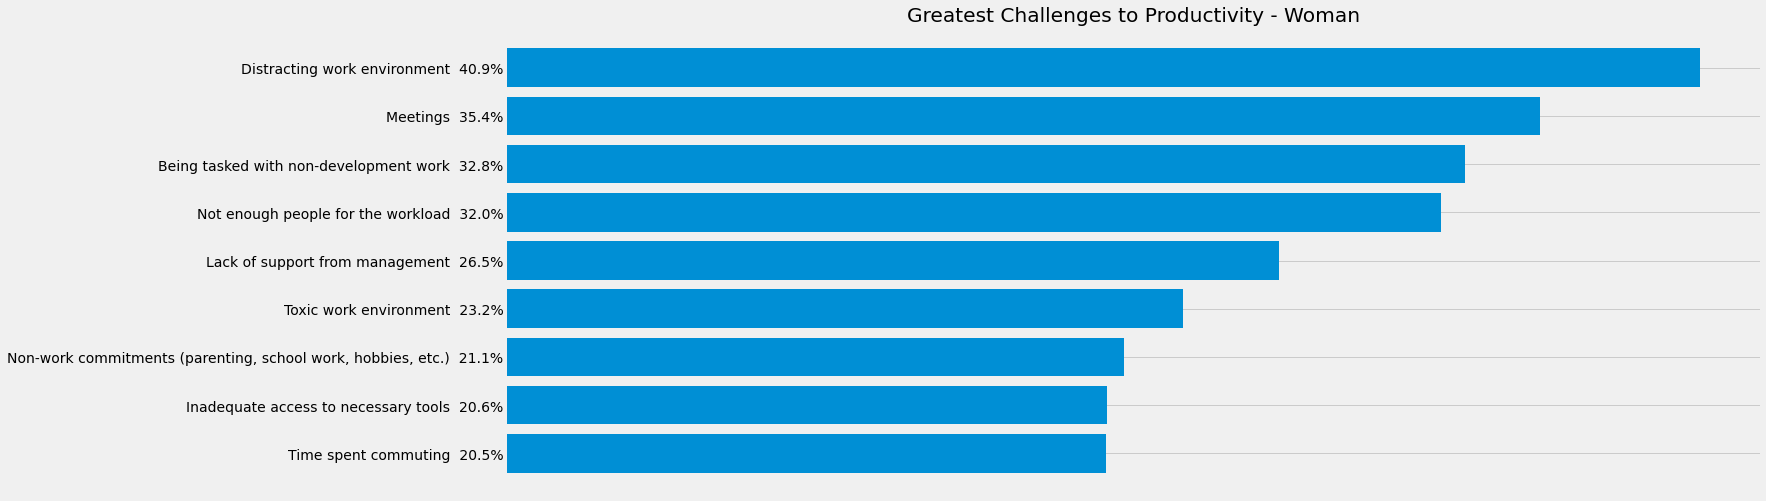

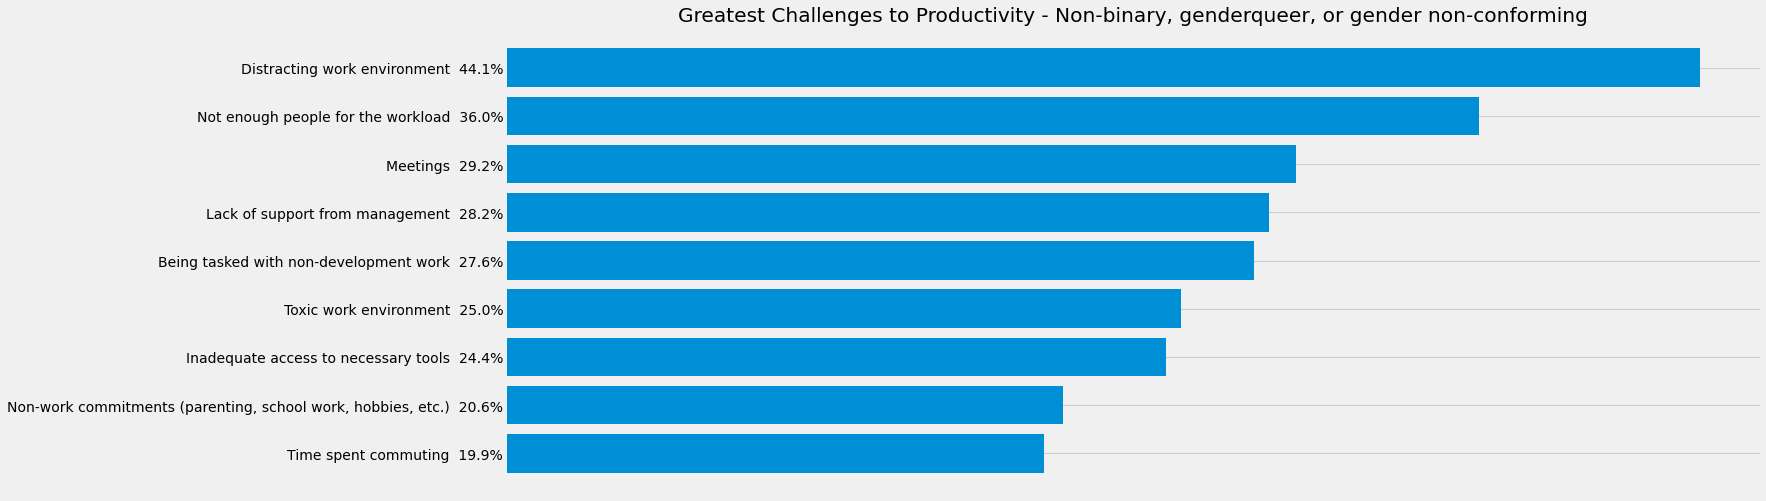

In [86]:
WorkChallenge = data["WorkChallenge"]
WorkChallenge.dropna(inplace=True)

Man = ["Man" , "Man;Non-binary, genderqueer, or gender non-conforming" ,"Woman;Man;Non-binary, genderqueer, or gender non-conforming", "Woman;Man"  ]
Non_binary = ['Non-binary, genderqueer, or gender non-conforming','Woman;Man;Non-binary, genderqueer, or gender non-conforming', 'Woman;Non-binary, genderqueer, or gender non-conforming', 'Man;Non-binary, genderqueer, or gender non-conforming' ]
Woman = ['Woman','Woman;Non-binary, genderqueer, or gender non-conforming','Woman;Man;Non-binary, genderqueer, or gender non-conforming', 'Woman;Man'  ]

Gender = [Man, Woman, Non_binary]

for i in Gender:
    new_list = []

    for k in i:
        new_data = data[ (WorkChallenge != "NaN") & ( data["Gender"] == k)]

        new_WorkChallenge = new_data["WorkChallenge"]
        new_WorkChallenge = new_WorkChallenge.str.split(";")

        for s in new_WorkChallenge:
            new_list.append(s)
    

    

    Double_list_sort_count(new_list , False)

    Build_Barh_sizes( key_Phrases , Quantity, new_list ,"fivethirtyeight", False , (20,8), "Greatest Challenges to Productivity - " + i[0])  # Building a schedule


Weighting Productivity Challenges in the US

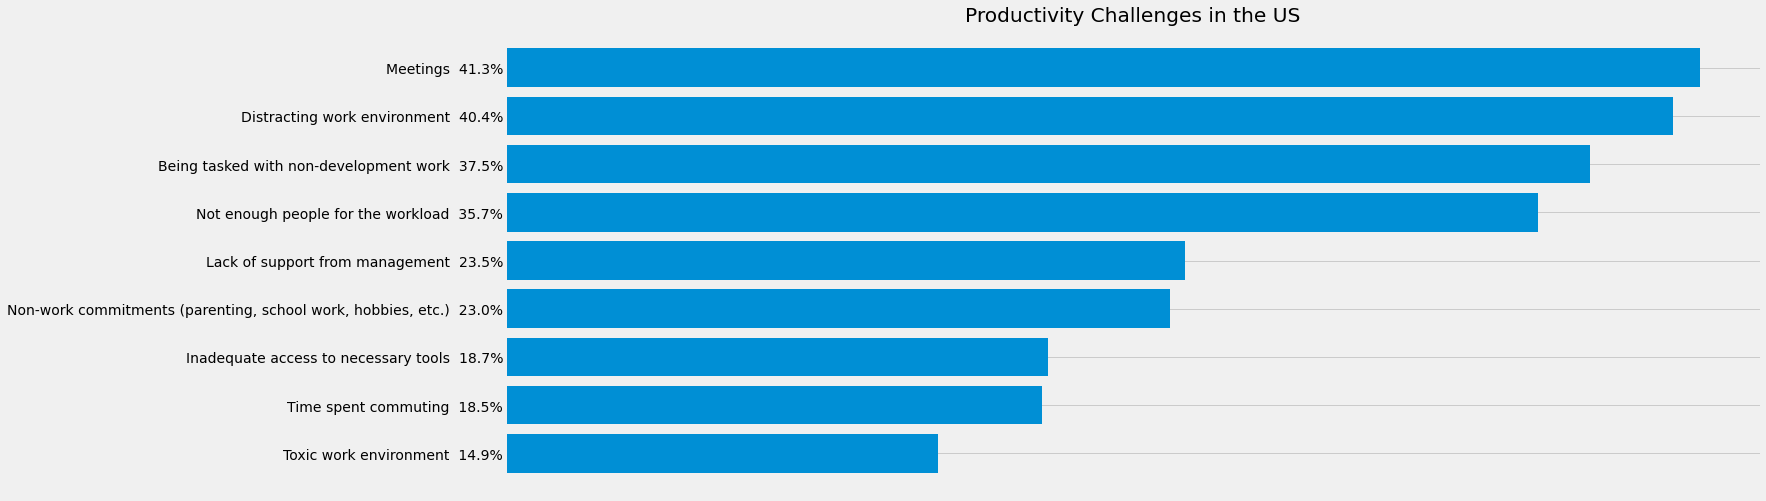

In [87]:
WorkChallenge = data["WorkChallenge"]
WorkChallenge.dropna(inplace=True)


new_data = data[ (WorkChallenge != "NaN") & (data["Country"] == "United States")]

new_WorkChallenge = new_data["WorkChallenge"]
new_WorkChallenge = new_WorkChallenge.str.split(";")

Double_list_sort_count(new_WorkChallenge , False)

Build_Barh_sizes( key_Phrases , Quantity, new_WorkChallenge ,"fivethirtyeight", False , (20,8), "Productivity Challenges in the US")  # Building a schedule

Quality of Open Source Software

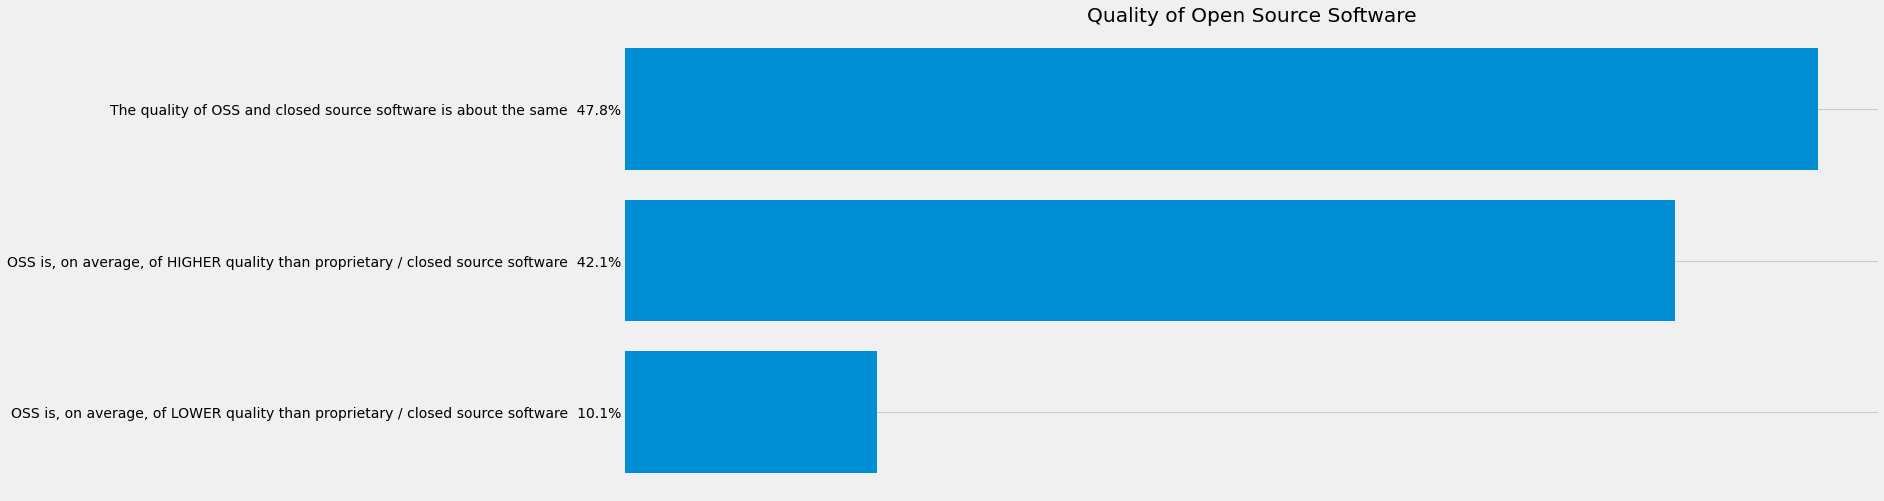

In [88]:
OpenSource = data["OpenSource"]
OpenSource.dropna(inplace=True)


Dictionary_Distributor(OpenSource , False)
Build_Barh_sizes( key_Phrases , Quantity, OpenSource ,"fivethirtyeight", False , (20,8), "Quality of Open Source Software")  # Building a schedule


Code Review

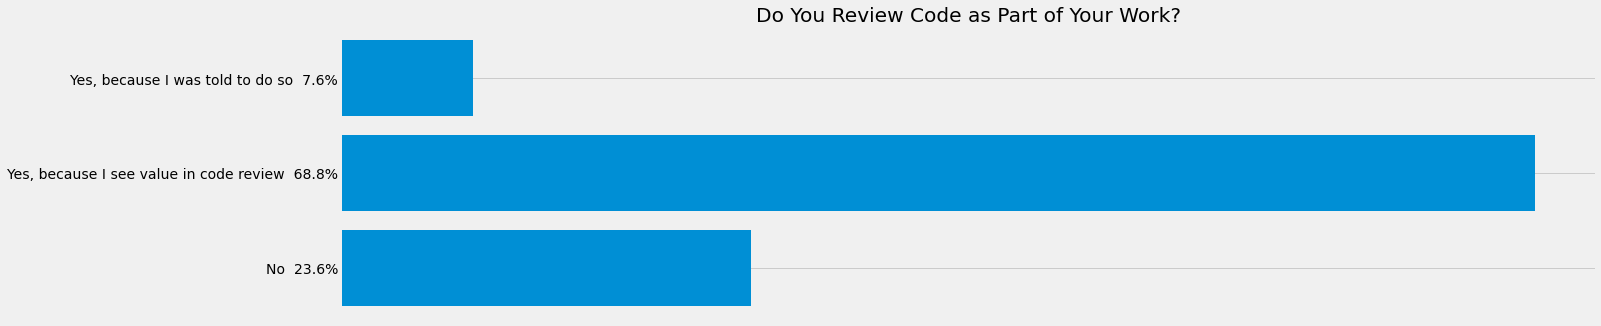

In [89]:
CodeRev = data["CodeRev"]
CodeRev.dropna(inplace=True)

CodeRev_Counted = Counter(CodeRev)

key_Phrases = key_Phrases = ['Yes, because I was told to do so' , 'Yes, because I see value in code review', 'No']
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(CodeRev_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, CodeRev ,"fivethirtyeight", False , (20,5), "Do You Review Code as Part of Your Work?")  # Building a schedule



Unit Tests

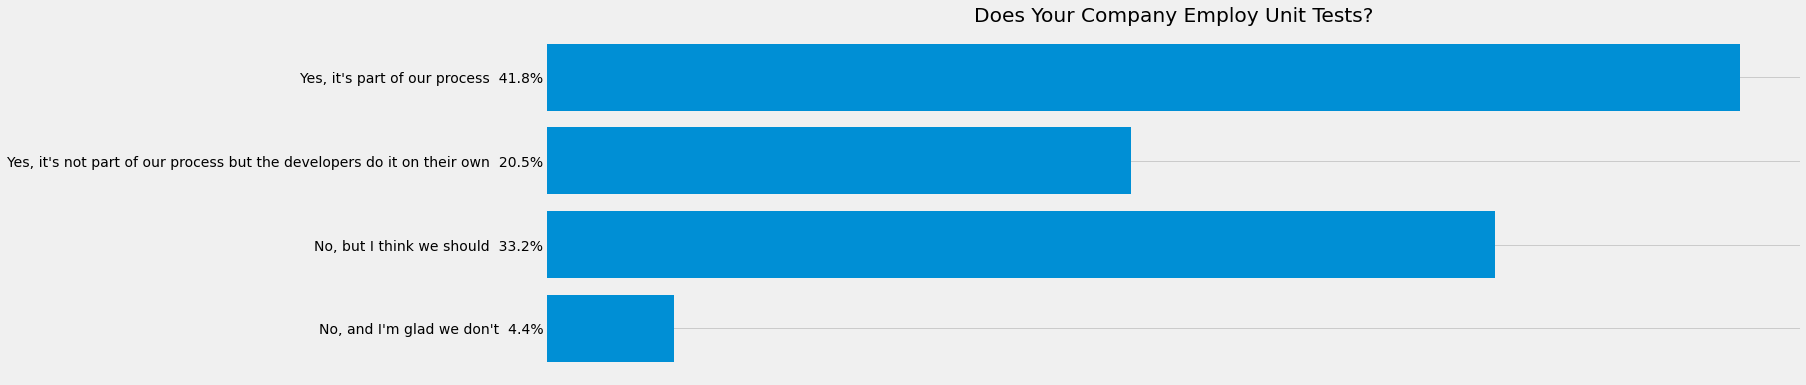

In [90]:
UnitTests = data["UnitTests"]
UnitTests.dropna(inplace=True)

UnitTests_Counted = Counter(UnitTests)

key_Phrases = key_Phrases = ["Yes, it's part of our process" , "Yes, it's not part of our process but the developers do it on their own" , "No, but I think we should" , "No, and I'm glad we don't"]
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(UnitTests_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, UnitTests ,"fivethirtyeight", False , (20,6), "Does Your Company Employ Unit Tests?")  # Building a schedule

